In [1]:
# ===================================
# !!! SET UP PATH AND MERGE FILES !!!
# ===================================

import csv
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import os

Nchunk = 20
trials = 1e4
directory = '/home/ambra/Desktop/cluster-morgana/archive_tests/tesi_05_final/'
nfolders = ['tesi_final_1e4_nominal_tmin90s50s_flux%d/' %(i+1) for i in range(3)]
dfolders = ['tesi_final_1e4_degraded_tmin90s50s_flux%d/' %(i+1) for i in range(3)]
folders = nfolders + dfolders

print(dfolders, nfolders, folders)

['tesi_final_1e4_degraded_tmin90s50s_flux1/', 'tesi_final_1e4_degraded_tmin90s50s_flux2/', 'tesi_final_1e4_degraded_tmin90s50s_flux3/'] ['tesi_final_1e4_nominal_tmin90s50s_flux1/', 'tesi_final_1e4_nominal_tmin90s50s_flux2/', 'tesi_final_1e4_nominal_tmin90s50s_flux3/'] ['tesi_final_1e4_nominal_tmin90s50s_flux1/', 'tesi_final_1e4_nominal_tmin90s50s_flux2/', 'tesi_final_1e4_nominal_tmin90s50s_flux3/', 'tesi_final_1e4_degraded_tmin90s50s_flux1/', 'tesi_final_1e4_degraded_tmin90s50s_flux2/', 'tesi_final_1e4_degraded_tmin90s50s_flux3/']


In [2]:
for i, f in enumerate(folders):
    os.system('mkdir %spng' %(directory+f))
    path = directory + f + 'run0406/run0406_ID000126/csv/'

    texp = [10,100]
    sigma = [5]
    chunk = [i+1 for i in range(Nchunk)]

    csvName = [[]*i for i in range(len(texp))]
    for i in range(len(chunk)) :  
        for j in range(len(texp)) :
            csvName[j].append('run0406_%ds_chunk%02d.csv' % (texp[j], chunk[i]))
            
    # merge files ---!
    csvMerged = []
    for j in range(len(texp)) :
        csvMerged.append('run0406_%ds.csv' %texp[j])

        fout = open(path+csvMerged[j],'w+')
        # first file ---!
        for line in open(path+csvName[j][0]):
            fout.write(line)
        # remaining files ---!    
        for i in range(len(chunk)-1):
            f = open(path+csvName[j][i+1])
            next(f) # skip the header ---!
            for line in f:
                 fout.write(line)
            f.close() 
        fout.close()

    print(csvMerged)
    data = []
    for f in csvMerged:
        data.append(f.replace('run0406', 'data'))
        with open(path+f, 'r') as inp, open(path+f.replace('run0406', 'data'), 'w') as out:
            writer = csv.writer(out)
            for i, row in enumerate(csv.reader(inp)):
                if i == 0:
                    out.write('#trial,texp,sigma,Ndet,Nsrc,RA_det,DEC_det,RA_fit,DEC_fit,flux_ph,TS\n')
                else:
                    writer.writerow(row)
    print(data)
print('done')

['run0406_10s.csv', 'run0406_100s.csv']
['data_10s.csv', 'data_100s.csv']
['run0406_10s.csv', 'run0406_100s.csv']
['data_10s.csv', 'data_100s.csv']
['run0406_10s.csv', 'run0406_100s.csv']
['data_10s.csv', 'data_100s.csv']
['run0406_10s.csv', 'run0406_100s.csv']
['data_10s.csv', 'data_100s.csv']
['run0406_10s.csv', 'run0406_100s.csv']
['data_10s.csv', 'data_100s.csv']
['run0406_10s.csv', 'run0406_100s.csv']
['data_10s.csv', 'data_100s.csv']
done


In [3]:
# reformat files ---!
#for f in csvMerged:
#    with open(path+f, 'r') as inp, open(path+f.replace('.csv', '_mod.csv'), 'w') as out:
#        writer = csv.writer(out)
#        for row in csv.reader(inp):
#            if len(row) == 6 and ('ID' in row[0] or '#' in row[0]):
#                writer.writerow(row)


#for index, f in enumerate(csvMerged):
#    csvMerged[index] = f.replace('.csv', '_mod.csv')
#print(csvMerged)

In [13]:
# data params ---!
threshold = 0.5
ts_threshold = 5
xlim=0.2
# initialize SphDistance calc ---!
trueRA = 33.057
trueDEC = -51.841
true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
# conf intervals params ---!
nstd = [1,2,3,5]
conf_probs = [0.6827, 0.9545, 0.9973, 0.99994]
# img params ---!
fontsize=30
CI_colors = ['k', 'r', 'g', 'w']
# hist params ---!
nbin = 50
wbin = 0.02
hist=True

In [16]:
# ------------------------------------------ plots ---!
def plottage(texp, ra, dec, pos, flux, mean_flux, ts, mean_ts,
             std_ra, std_dec, modes, std_flux, std_ts,
             trueRA, trueDEC, png_path, lset=None, prefix='run0406_'):
    
    if lset=='flux':
        fluxes = [3,2,1]
        l_ra = ['f/%d, $\sigma$=%.3f' %(fluxes[i], std_ra[i]) for i in range(len(fluxes))]
        l_dec = ['f/%d, $\sigma$=%.3f' %(fluxes[i], std_dec[i]) for i in range(len(fluxes))]
        l_pos = ['f/%d, $\gamma$=%.3f' %(fluxes[i], modes[i]) for i in range(len(fluxes))]
        l_flux = ['f/%d, $\sigma$=%.3E' %(fluxes[i], std_flux[i]) for i in range(len(fluxes))]
        l_ts = ['f/%d, $\sigma$=%.3E' %(fluxes[i], std_ts[i]) for i in range(len(fluxes))]
    else:
        l_ra = ['texp=%ds, $\sigma$=%.3f' %(texp[i], std_ra[i]) for i in range(len(texp))]
        l_dec = ['texp=%ds, $\sigma$=%.3f' %(texp[i], std_dec[i]) for i in range(len(texp))]
        l_pos = ['texp=%ds, $\gamma$=%.3f' %(texp[i], modes[i]) for i in range(len(texp))]
        l_flux = ['texp=%ds, $\sigma$=%.3E' %(texp[i], std_flux[i]) for i in range(len(texp))]
        l_ts = ['texp=%ds, $\sigma$=%.3E' %(texp[i], std_ts[i]) for i in range(len(texp))]


    c = ['darkgreen', 'red', 'navy', 'gold']
    alpha = 0.3
    hist=True
    
    # conf intervals params ---!
    nstd = [1,2,3,5]
    conf_probs = [0.6827, 0.9545, 0.9973, 0.99994]
    # img params ---!
    fontsize=30
    CI_colors = ['k', 'r', 'g', 'w']

    # DETECTION 1D ---!
    fig, ax = hist1d_gauss(ra, mean=None, loc=trueRA, threshold=threshold, nbin=Dnbin, width=Dwidth,
                           fontsize=fontsize, color=c, alpha=alpha, hist=hist,
                           title='detected RA distribution', leglabel=l_ra,
                           xlabel='RA (deg)', ylabel='counts density',
                           filename=png_path+prefix+'detRA_h%s.png' %str(hist))   
    plt.show()
    plt.close()

    fig, ax = hist1d_gauss(dec, mean=None, loc=trueDEC, nbin=Dnbin, width=Dwidth,
                           threshold=threshold, fontsize=fontsize, color=c, alpha=alpha,
                           title='detected DEC distribution', leglabel=l_dec, hist=hist, 
                           xlabel='DEC (deg)', ylabel='counts density',
                           filename=png_path+prefix+'detDEC_h%s.png' %str(hist)) 
    plt.show()
    plt.close()

    fig, ax = hist1d_rayleigh(pos, mean=None, rayleigh_prms={'loc':0, 'scale':None}, 
                              threshold=threshold, nbin=Dnbin, width=Dwidth, fontsize=fontsize, 
                              color=c, alpha=alpha, leglabel=l_pos, hist=hist,
                              title='detected $\\Delta \\Theta$ distribution',
                              xlabel='$\\Delta \\Theta$ (deg)', ylabel='counts density',
                              filename=png_path+prefix+'detPOS_h%s.png' %str(hist))
    plt.show()
    plt.close()

    fig, ax = hist1d(flux, mean=mean_flux, nbin=30, fontsize=fontsize, color=c, 
                     alpha=alpha, leglabel=l_flux, hist=hist,
                     title='flux estimate distribution', xlabel='Integral Flux (ph/cm$^2$/s)',
                     ylabel='count density', filename=png_path+prefix+'flux_h%s.png' %str(hist))

    plt.show()
    plt.close()
    
    fig, ax = hist1d(ts, mean=mean_ts, nbin=30, fontsize=fontsize, color=c, 
                     alpha=alpha, leglabel=l_ts, hist=hist, xscale='linear',
                     title='significance distribution', xlabel='$\sigma$',
                     ylabel='count density', filename=png_path+prefix+'ts_h%s.png' %str(hist))

    plt.show()
    plt.close()
    
def mappage(ra, dec, pos, trueRA, trueDEC, texp, wbin=wbin, trials=trials, treshold=threshold):
    '''
    Positioning map 2d (Gauss & Rayleigh region of confidence).
    '''

    fig, ax = hist2d_gauss_CI(ra, dec, nbin=None, width=wbin, xcentre=trueRA, ycentre=trueDEC, 
                              threshold=threshold, colors=('k', 'r', 'orange', 'm'), 
                              ax_thresh=xlim, xlabel='RA (deg)', ylabel='DEC (deg)', show=True, 
                              title='localisation of source', interp=None,
                              filename=png_path + 'texp%ds_hist2d_CIgauss_map.png' %texp)

    fig, ax = hist2d_rayleigh_CI(ra, dec, nbin=None, width=wbin, xcentre=trueRA, ycentre=trueDEC, 
                                 threshold=threshold, colors=('k', 'r', 'orange', 'm'), 
                                 rayleigh_prms={'loc':0, 'scale':pos},
                                 ax_thresh=xlim, xlabel='RA (deg)', ylabel='DEC (deg)', show=True, 
                                 title='localisation of source', interp=None,
                                 filename=png_path + 'texp%ds_hist2d_CIrayleigh_map.png' %texp)
print('\n\nok')



ok



tesi_final_1e4_nominal_tmin90s50s_flux1/
data_10s.csv

================ texp = 10s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  10000
! NaN DETECTION RATE : 0.0 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 98.36 %
~ ra det mean: 33.05732760852045 ra det std: 0.019155230542163396
~ dec det mean: -51.840784487544255 dec det std: 0.01209530561101388
~ pos det mean: 0.015281985276256762 pos det gamma: 0.011967672123765491
~ flux fit mean: 5.2984493819350536e-09 flux fit std: 6.955130504871969e-10
~ ts fit mean: 16.68278890535998 ts fit std: 1.59327469246959


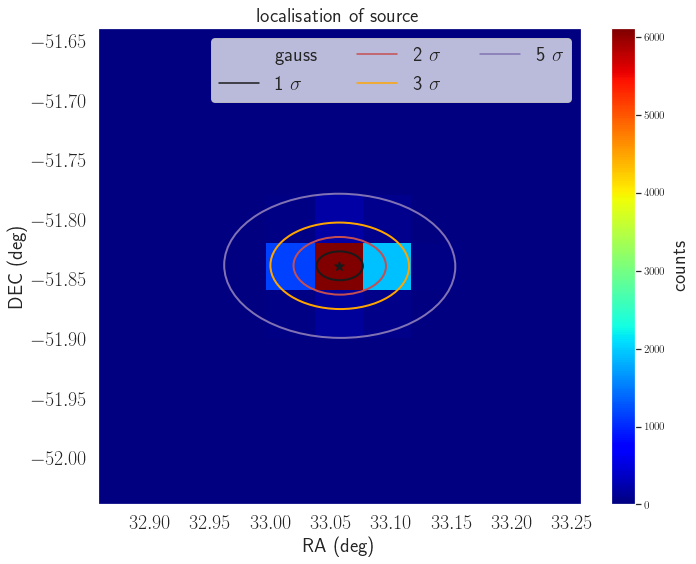

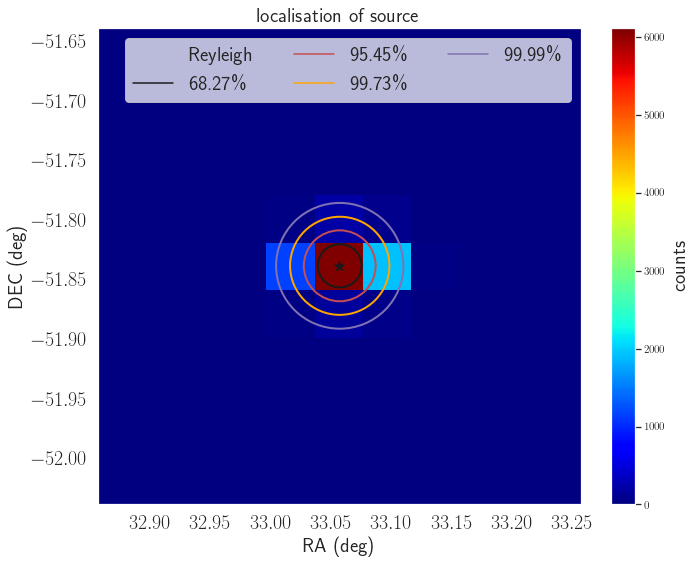

data_100s.csv

================ texp = 100s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  10000
! NaN DETECTION RATE : 0.0 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 99.33 %
~ ra det mean: 33.055602750590964 ra det std: 0.007391974219184243
~ dec det mean: -51.84059522797731 dec det std: 0.00994689111044369
~ pos det mean: 0.010663911376067215 pos det gamma: 0.007768805282581083
~ flux fit mean: 5.1120399484722545e-09 flux fit std: 2.8204887437878754e-10
~ ts fit mean: 51.57164099698579 ts fit std: 1.8559431387817262


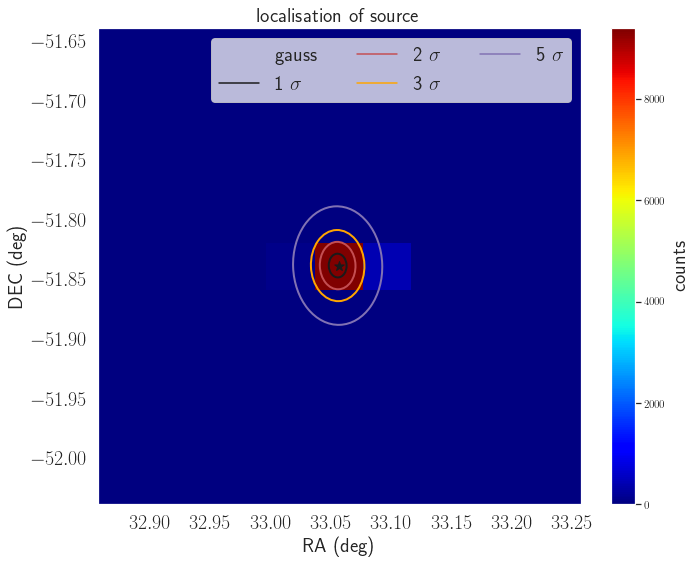

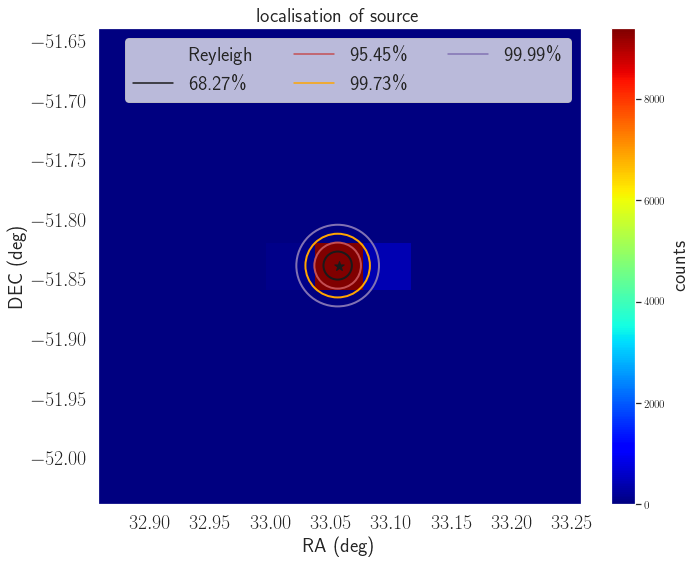

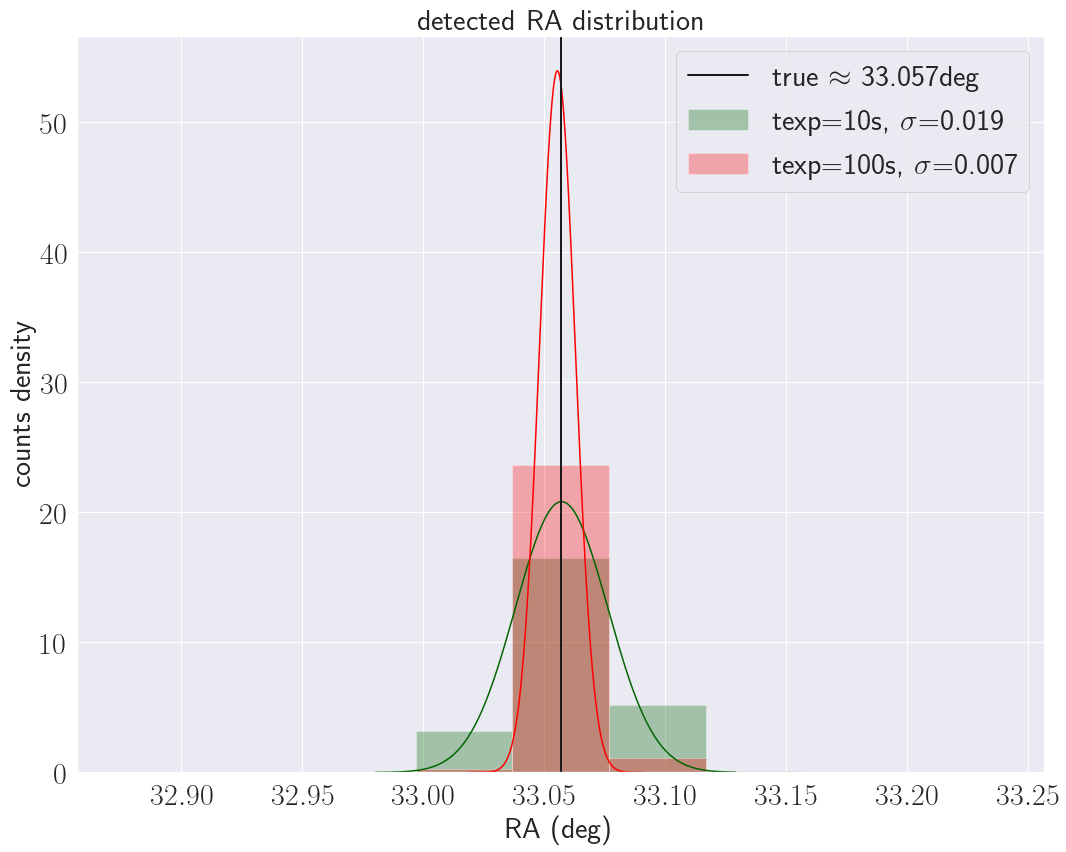

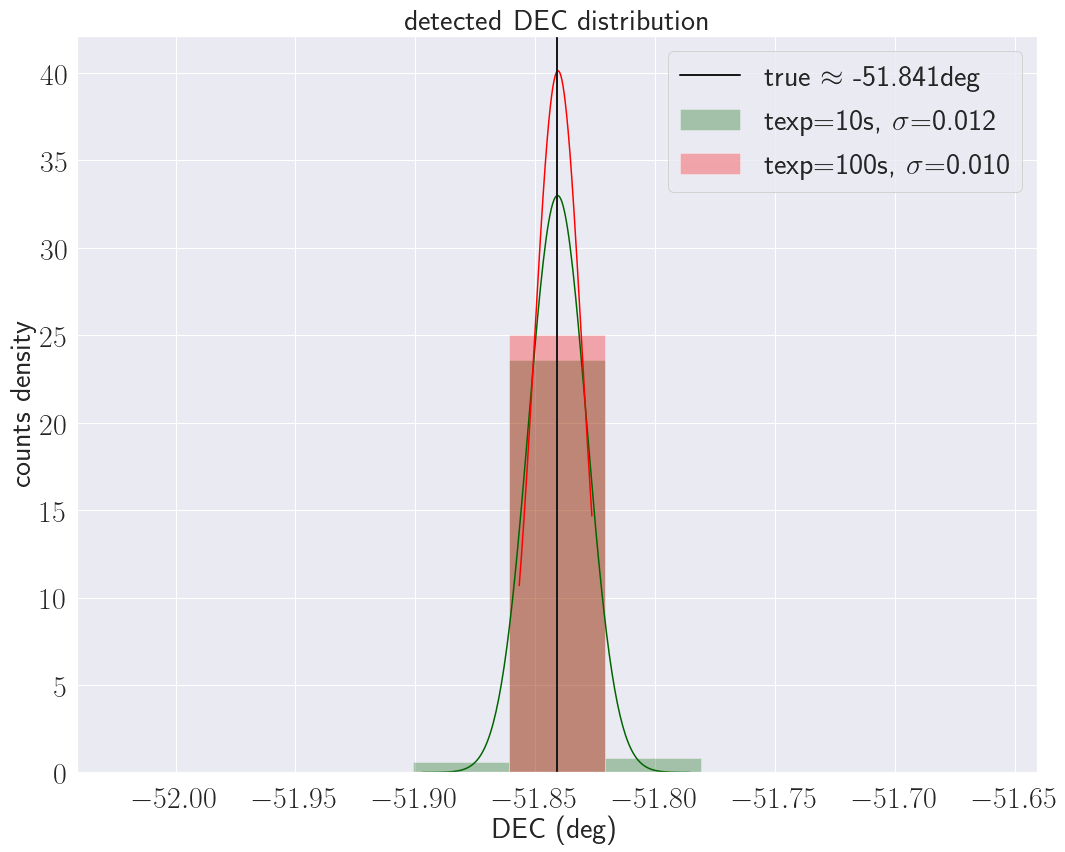

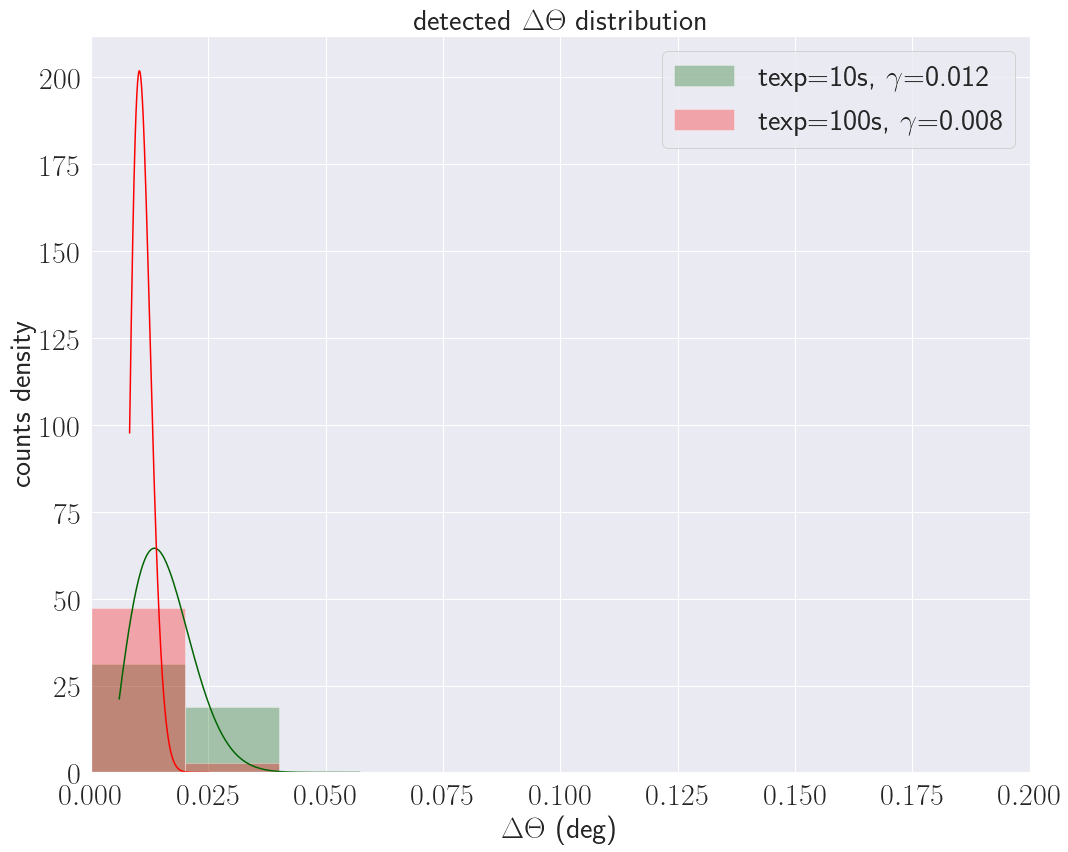

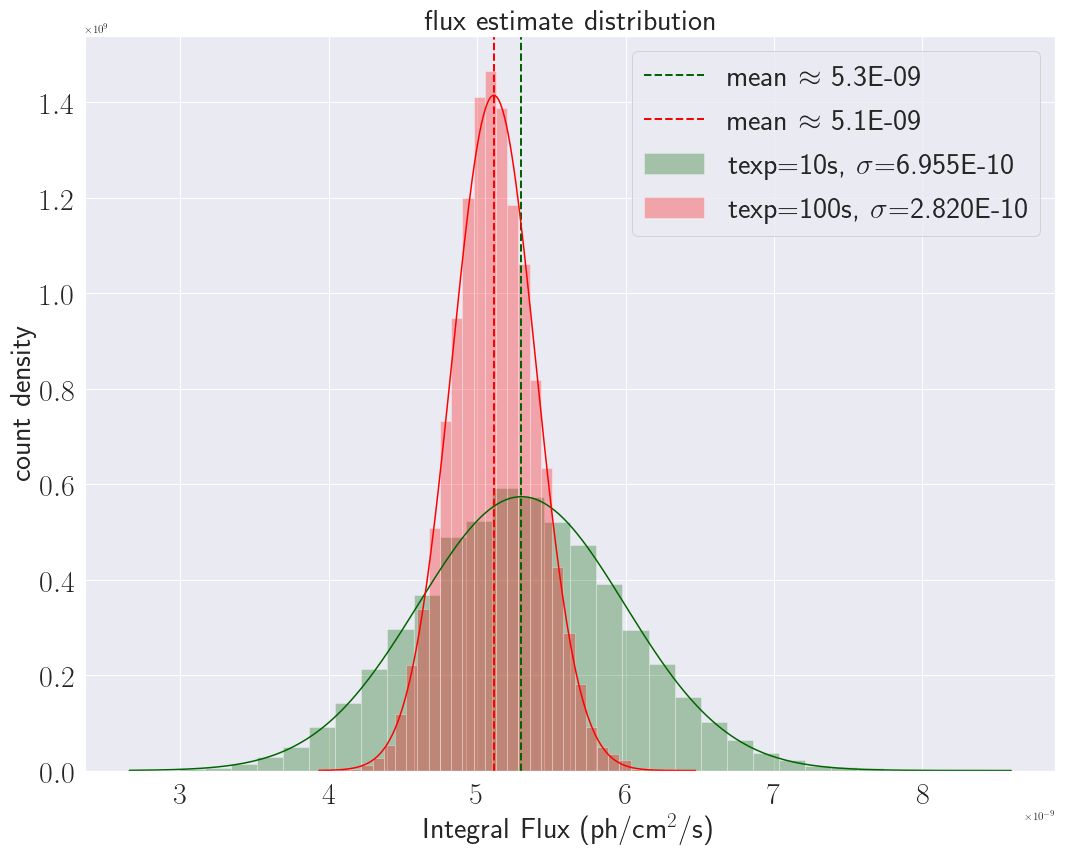

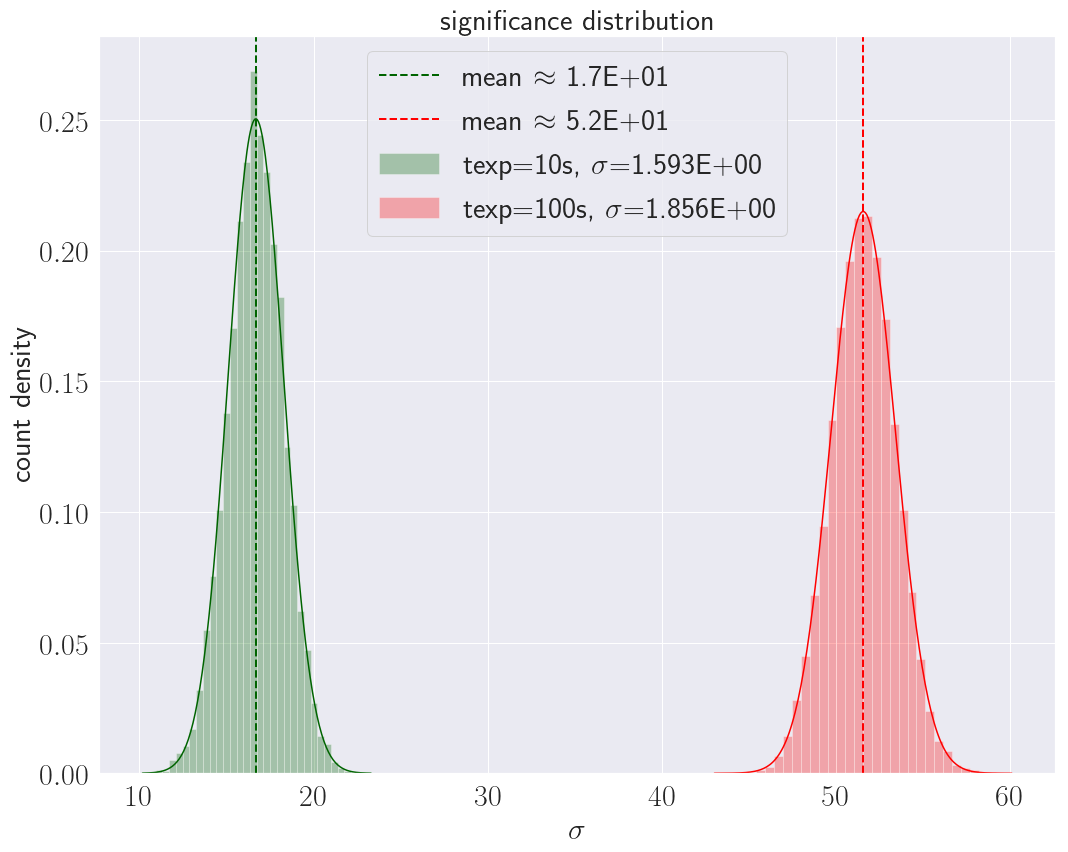

done plotting

tesi_final_1e4_nominal_tmin90s50s_flux2/
data_10s.csv

================ texp = 10s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  9979
! NaN DETECTION RATE : 0.20999999999999375 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 97.36 %
~ ra det mean: 33.057941349630894 ra det std: 0.02800602820750529
~ dec det mean: -51.840386389752325 dec det std: 0.01705325121067215
~ pos det mean: 0.021442289439881967 pos det gamma: 0.017189246668648066
~ flux fit mean: 2.6702152372546895e-09 flux fit std: 5.154957829397232e-10
~ ts fit mean: 10.390611057029886 ts fit std: 1.5240577029989926


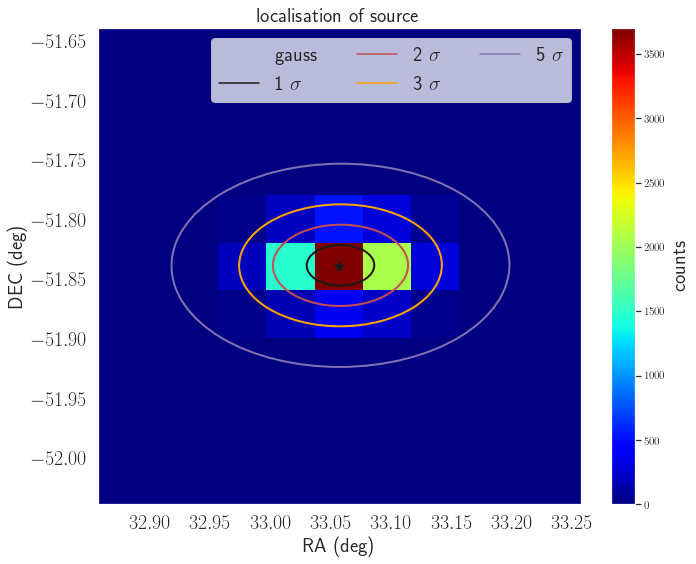

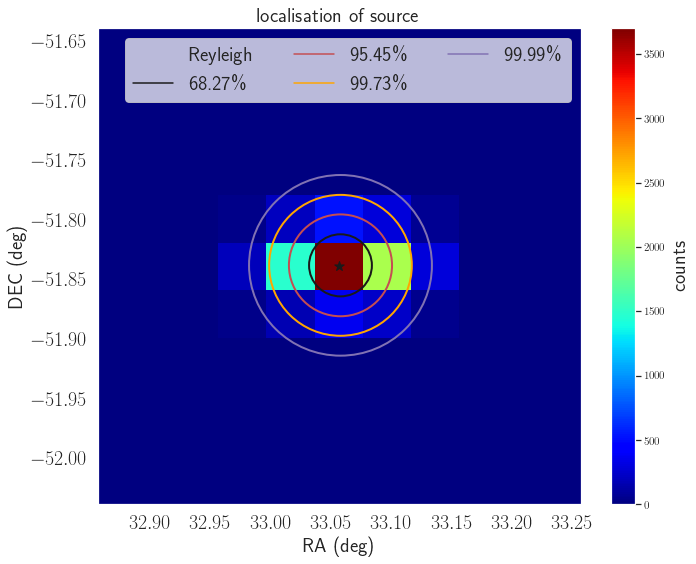

data_100s.csv

================ texp = 100s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  10000
! NaN DETECTION RATE : 0.0 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 99.35000000000001 %
~ ra det mean: 33.0569781661407 ra det std: 0.014881421567604023
~ dec det mean: -51.84061746596606 dec det std: 0.010508815778737707
~ pos det mean: 0.012895837546763544 pos det gamma: 0.009877253104288435
~ flux fit mean: 2.5713233391423177e-09 flux fit std: 2.1801617133946795e-10
~ ts fit mean: 32.103568220764416 ts fit std: 1.8408099779571157


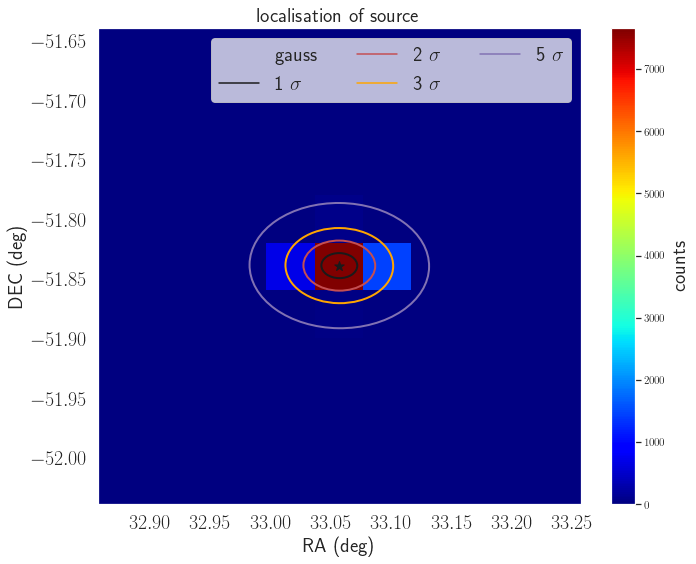

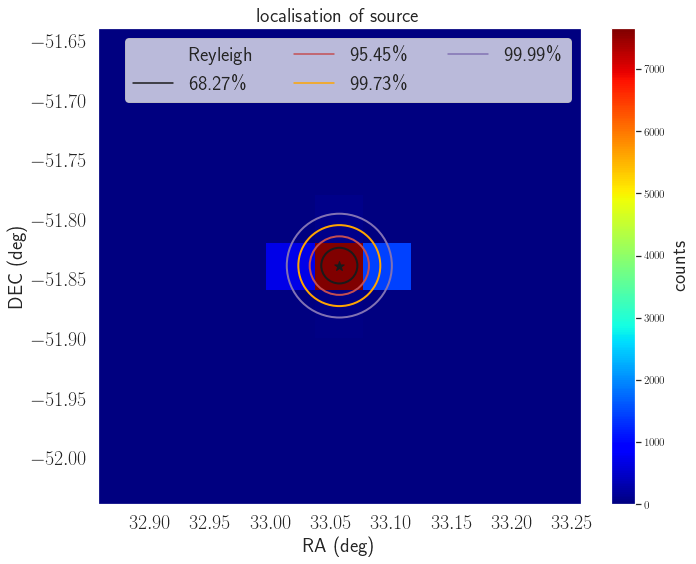

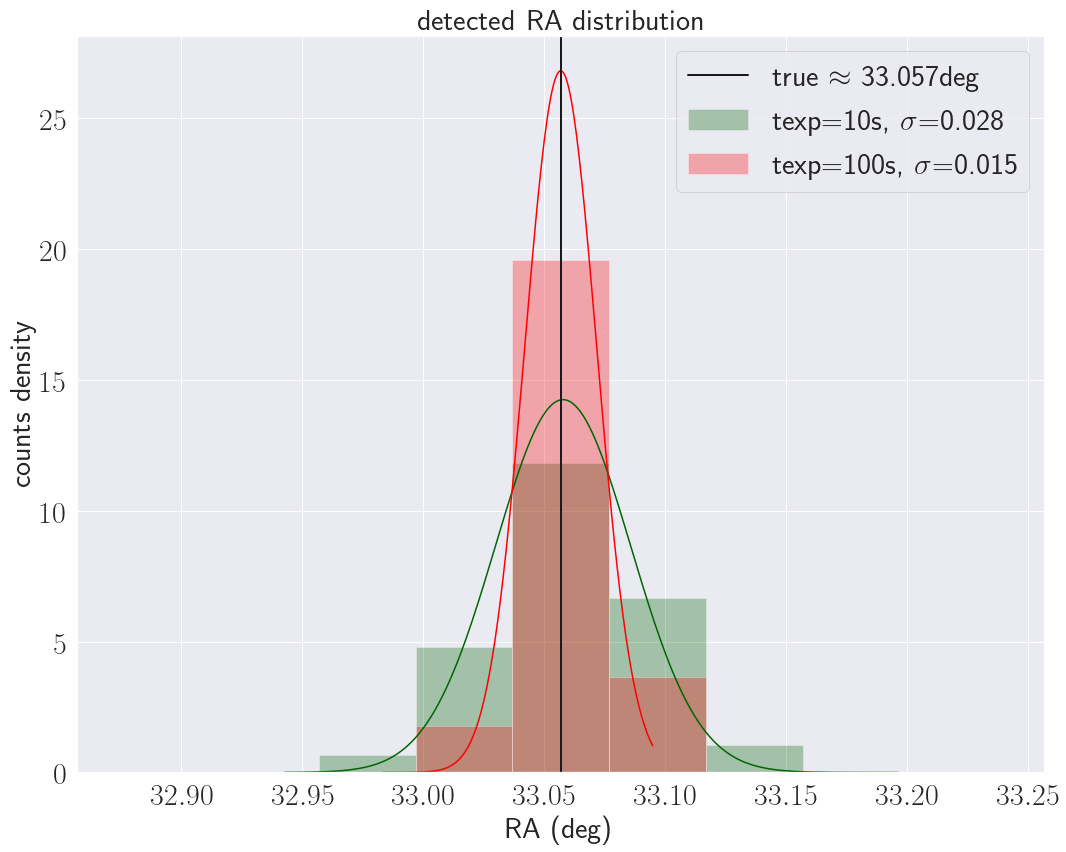

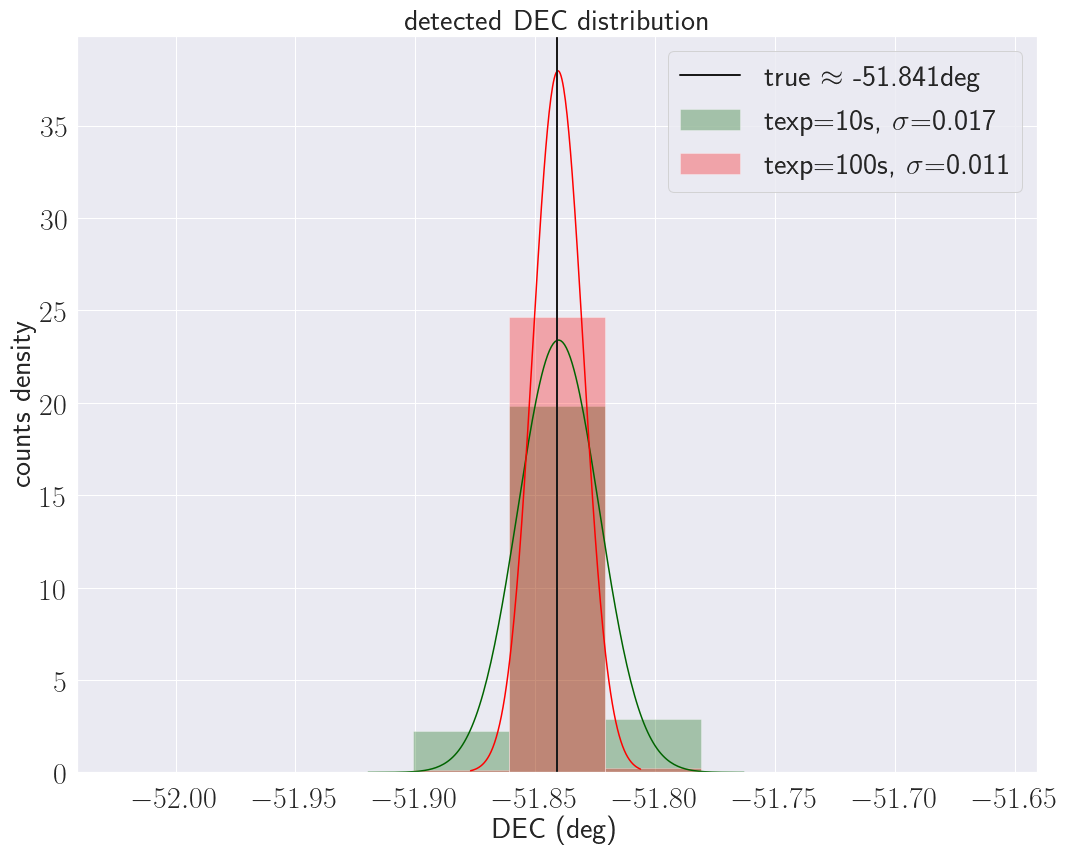

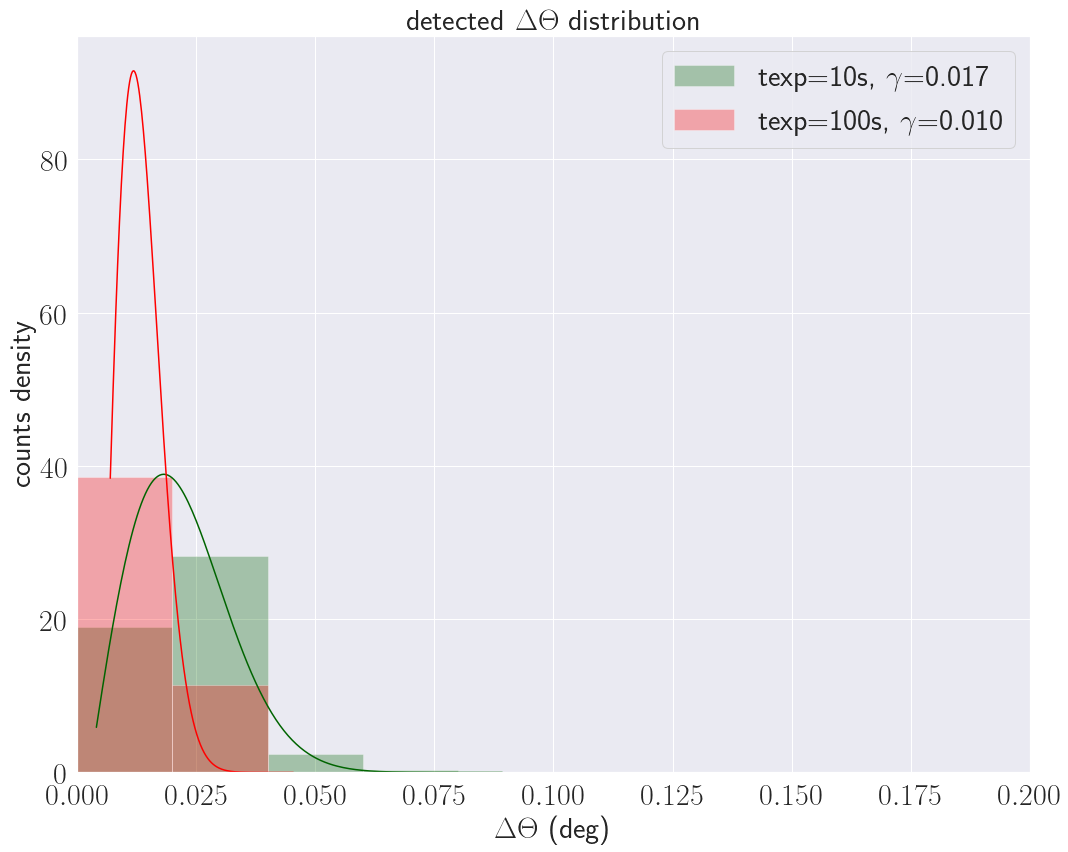

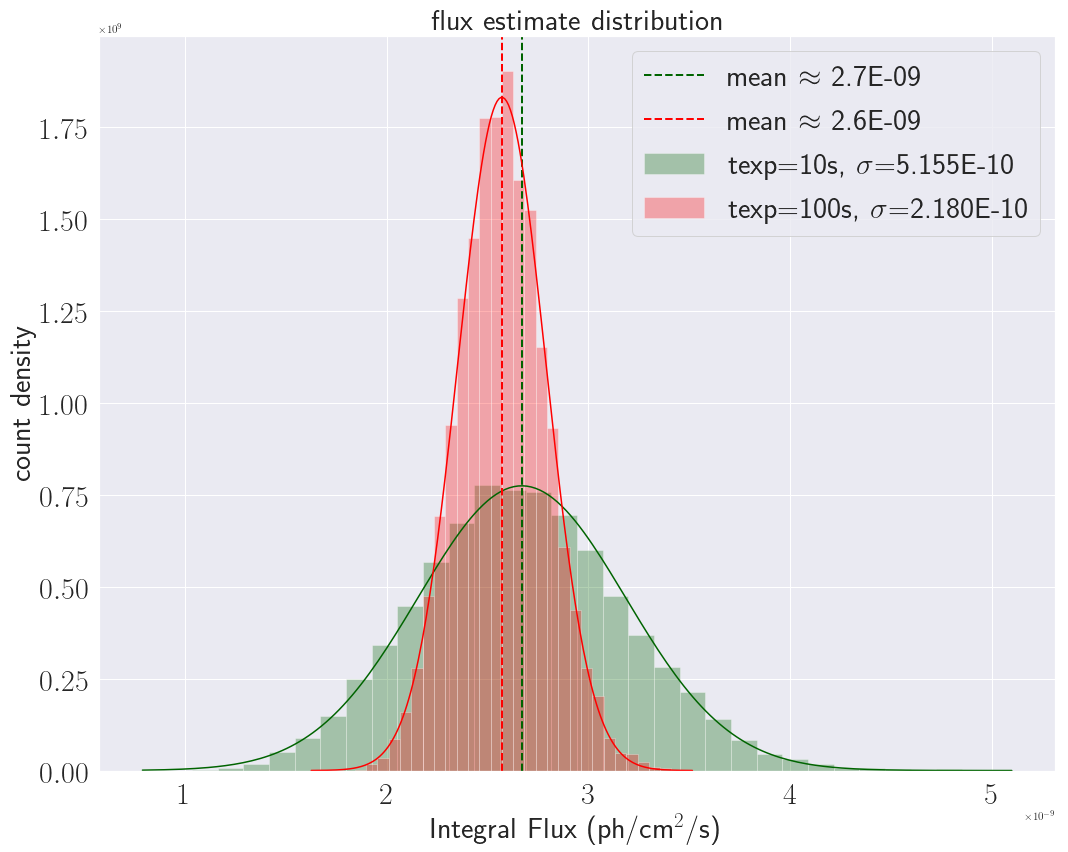

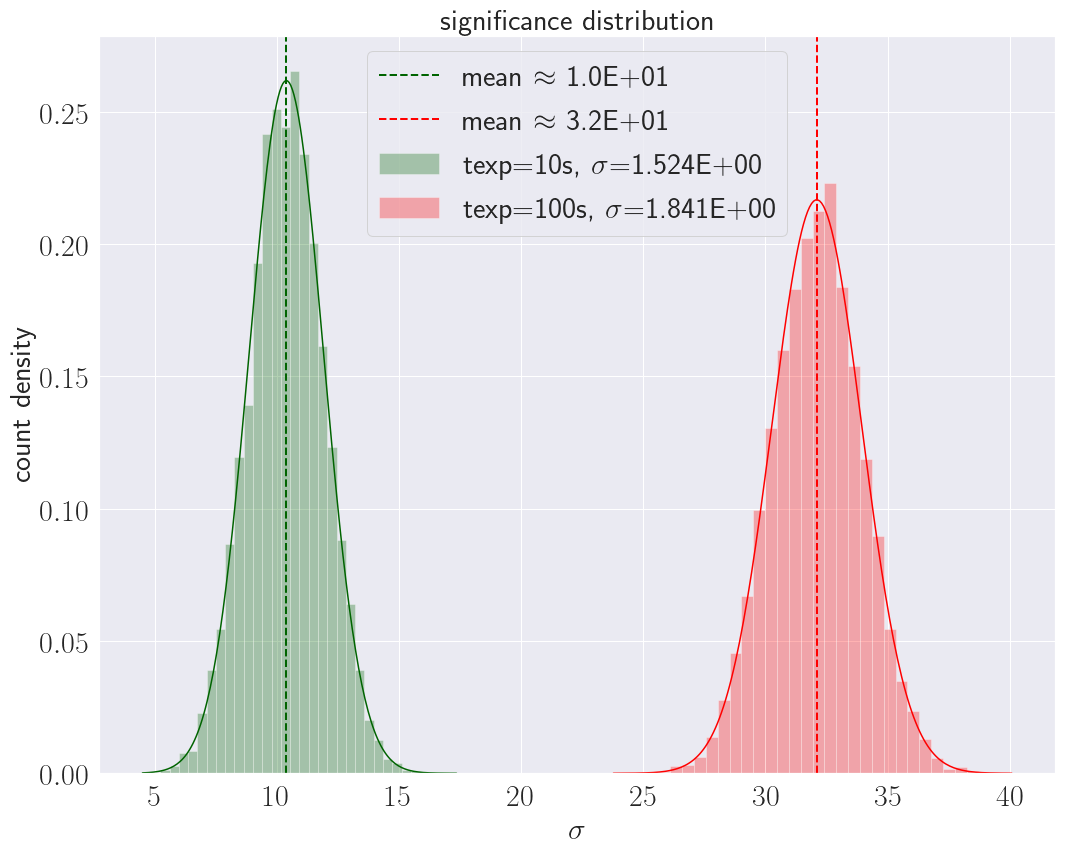

done plotting

tesi_final_1e4_nominal_tmin90s50s_flux3/
data_10s.csv

================ texp = 10s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  9066
! NaN DETECTION RATE : 9.340000000000003 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 79.96 %
~ ra det mean: 33.05843483035534 ra det std: 0.03453227096879083
~ dec det mean: -51.83979904622279 dec det std: 0.021845134634442667
~ pos det mean: 0.026777376626048496 pos det gamma: 0.02161781018710578
~ flux fit mean: 1.863510762713732e-09 flux fit std: 3.9723893840129893e-10
~ ts fit mean: 8.047393232264493 ts fit std: 1.3043605665094005


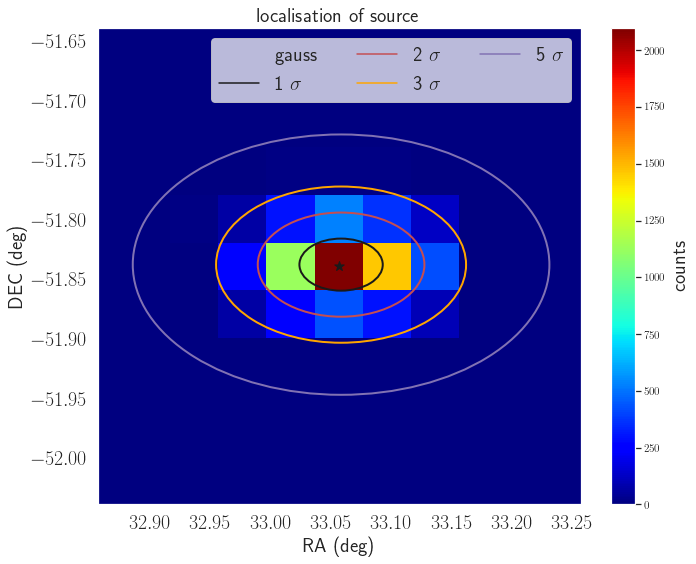

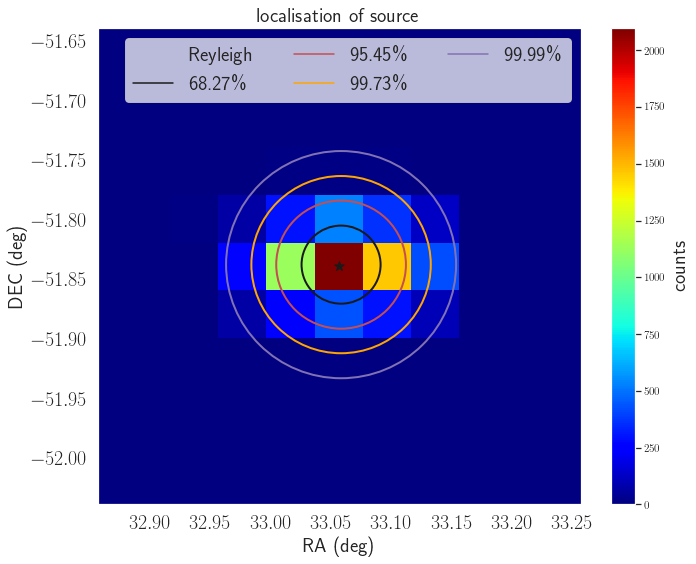

data_100s.csv

================ texp = 100s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  10000
! NaN DETECTION RATE : 0.0 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 99.67 %
~ ra det mean: 33.05771123382151 ra det std: 0.02129135880093001
~ dec det mean: -51.840431660650296 dec det std: 0.012403044664816752
~ pos det mean: 0.015762031777452987 pos det gamma: 0.012793764080004438
~ flux fit mean: 1.7207418496722236e-09 flux fit std: 1.913068761080921e-10
~ ts fit mean: 24.09268592762247 ts fit std: 1.8462469675209243


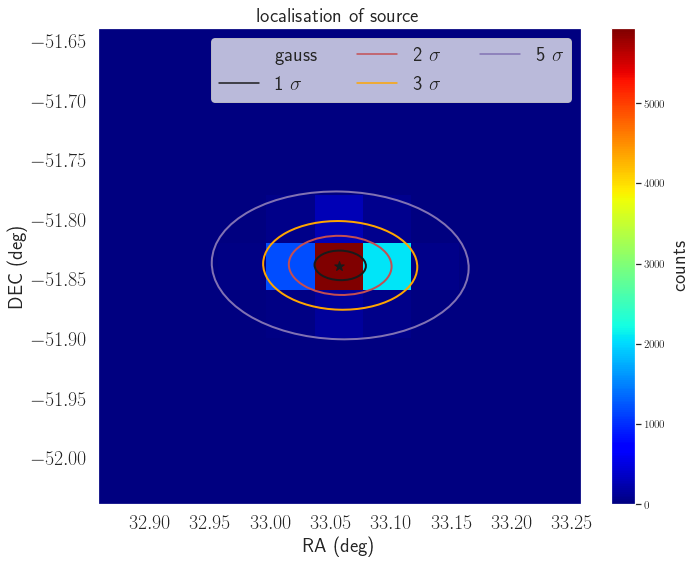

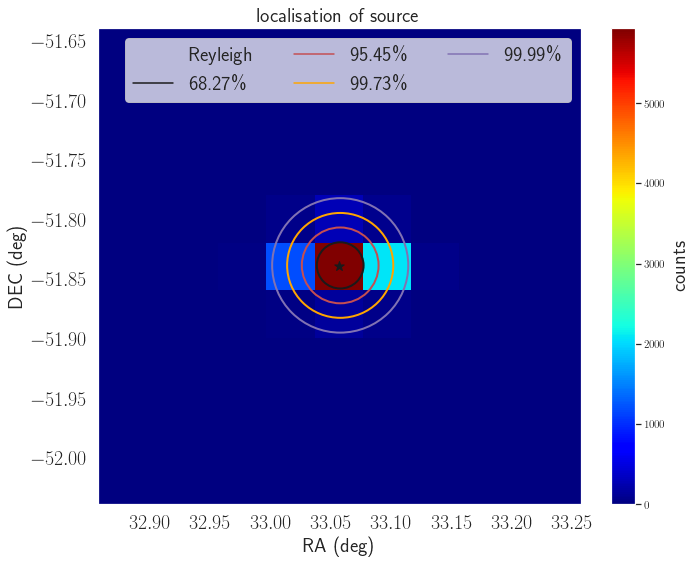

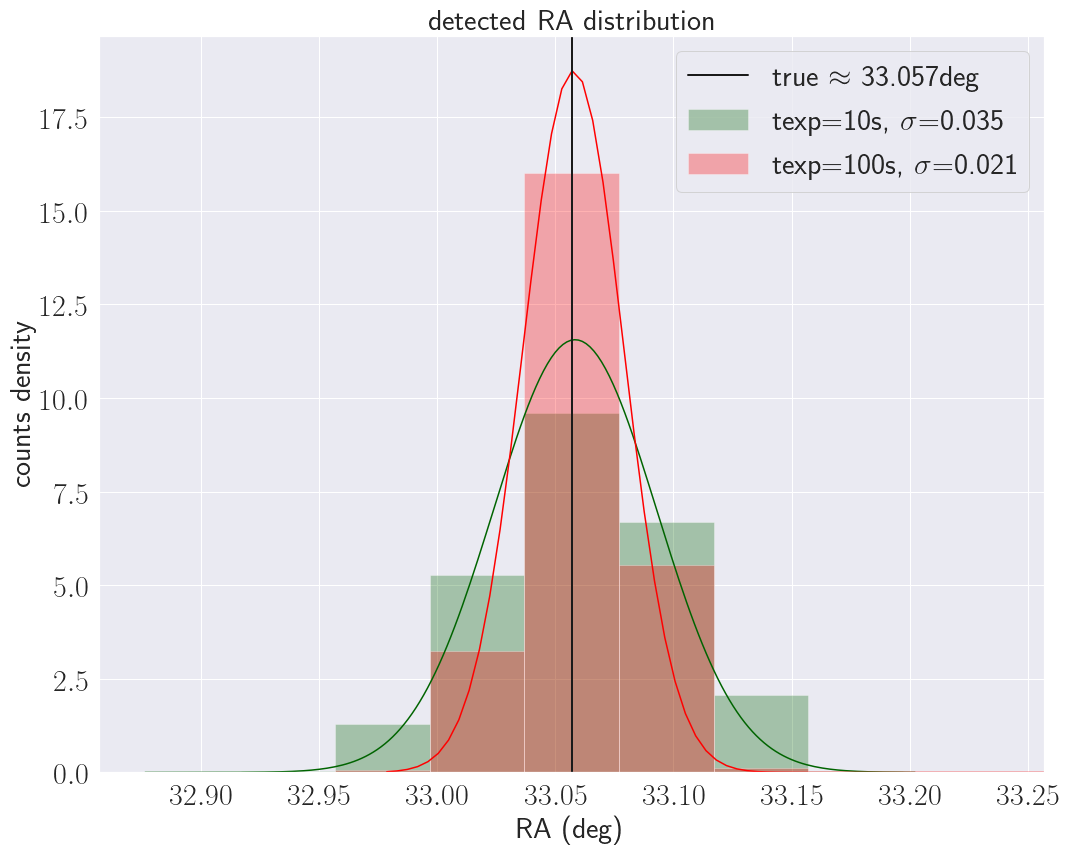

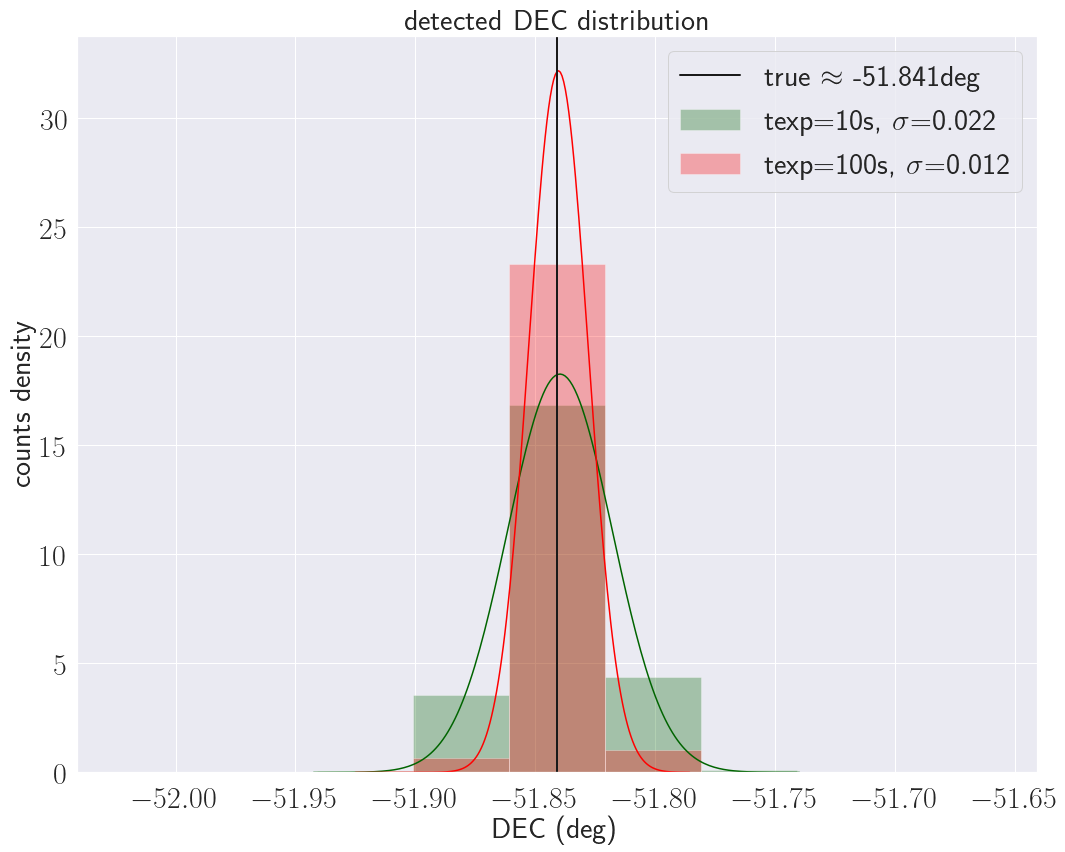

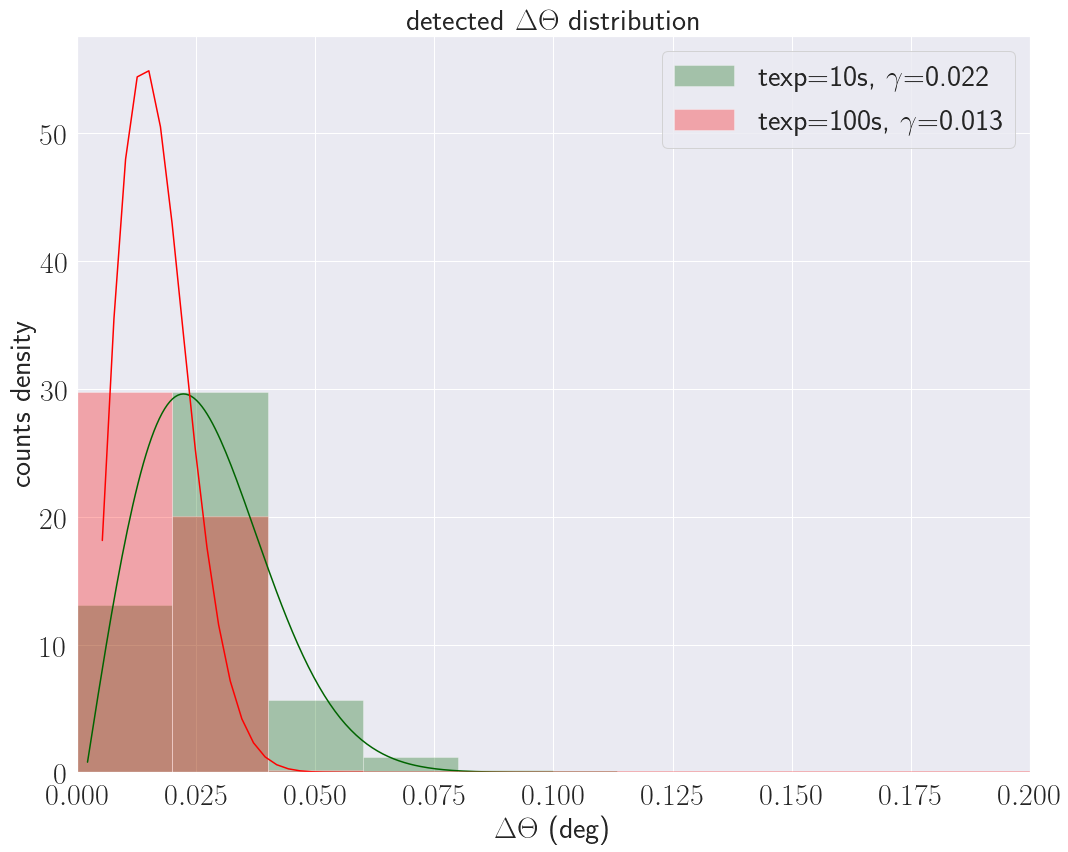

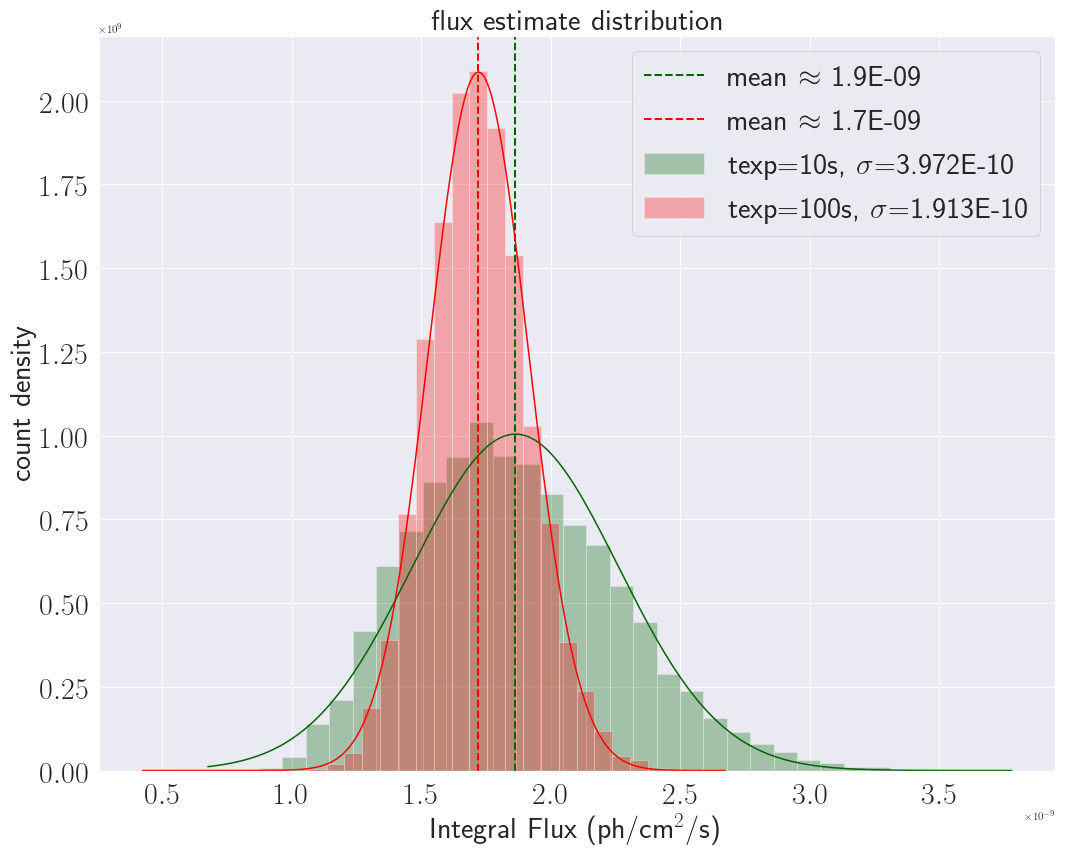

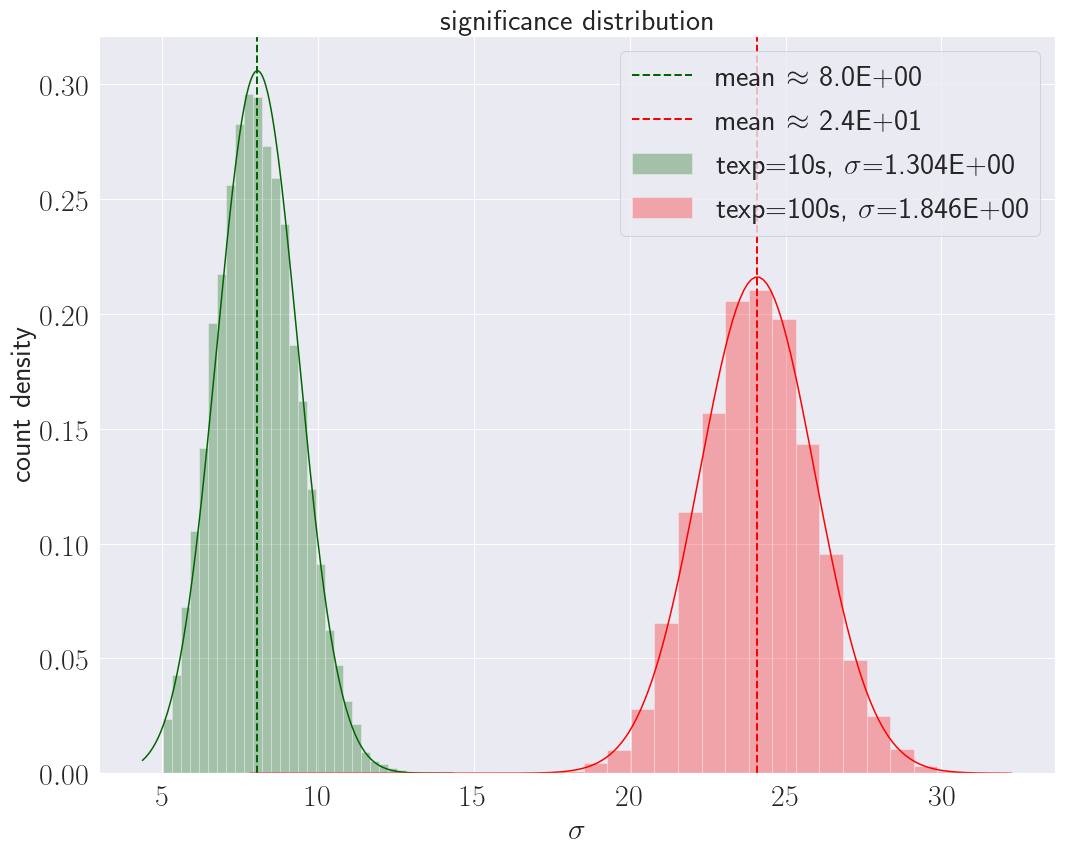

done plotting

tesi_final_1e4_degraded_tmin90s50s_flux1/
data_10s.csv

================ texp = 10s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  9999
! NaN DETECTION RATE : 0.010000000000005116 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 93.92 %
~ ra det mean: 33.05709226661067 ra det std: 0.02650239160394103
~ dec det mean: -51.84062404318885 dec det std: 0.016068817135848793
~ pos det mean: 0.02031181642730792 pos det gamma: 0.016224622746002813
~ flux fit mean: 5.308871481400539e-09 flux fit std: 9.98589407883534e-10
~ ts fit mean: 11.800364949471268 ts fit std: 1.6236659528921695


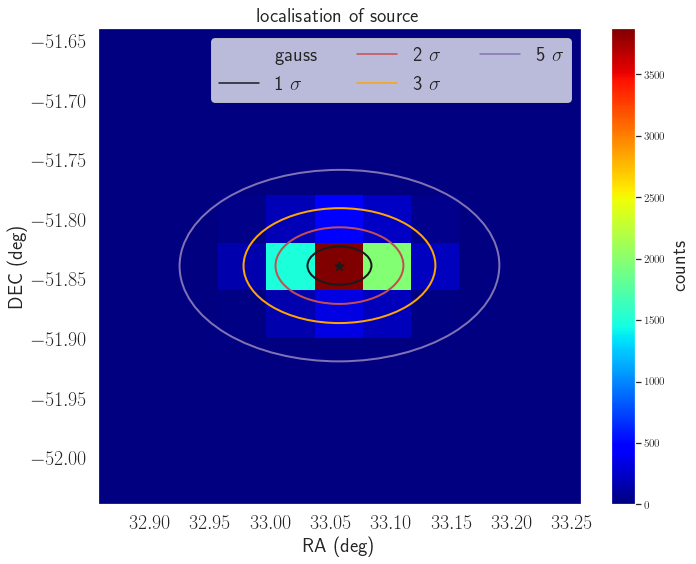

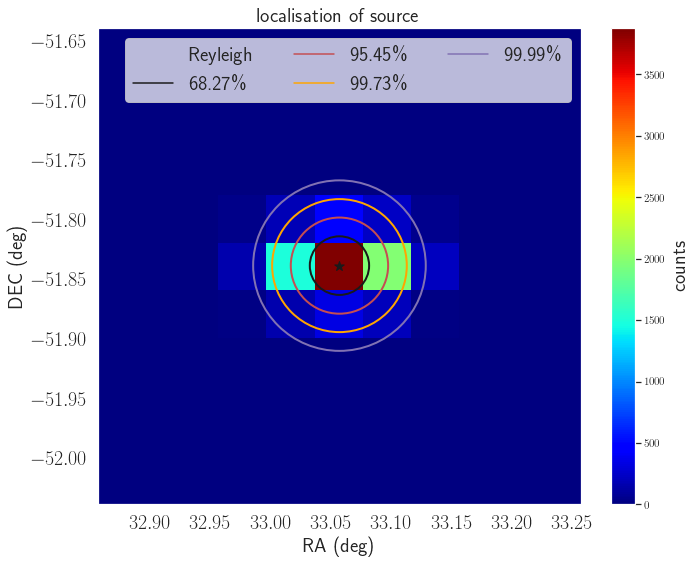

data_100s.csv

================ texp = 100s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  10000
! NaN DETECTION RATE : 0.0 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 97.57000000000001 %
~ ra det mean: 33.05650870407427 ra det std: 0.015125418450749743
~ dec det mean: -51.84064642663217 dec det std: 0.011375433892387193
~ pos det mean: 0.012157988215333433 pos det gamma: 0.010419327263270203
~ flux fit mean: 5.116013442730306e-09 flux fit std: 4.05980590118517e-10
~ ts fit mean: 36.476316349341815 ts fit std: 1.9304351519973808


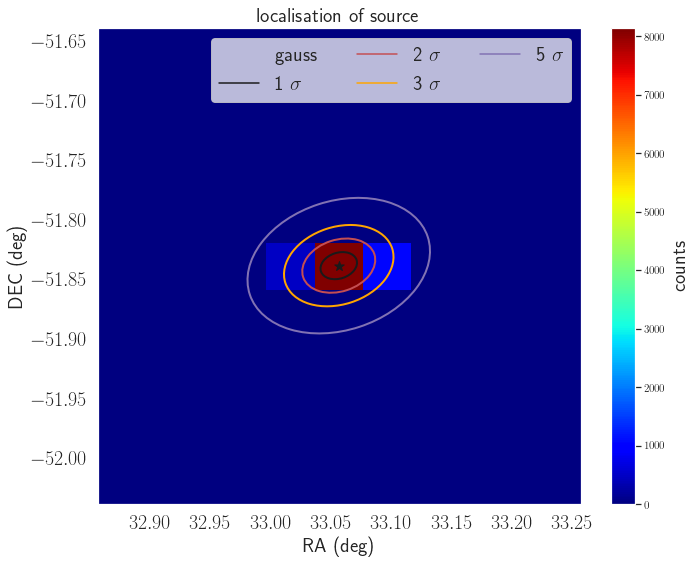

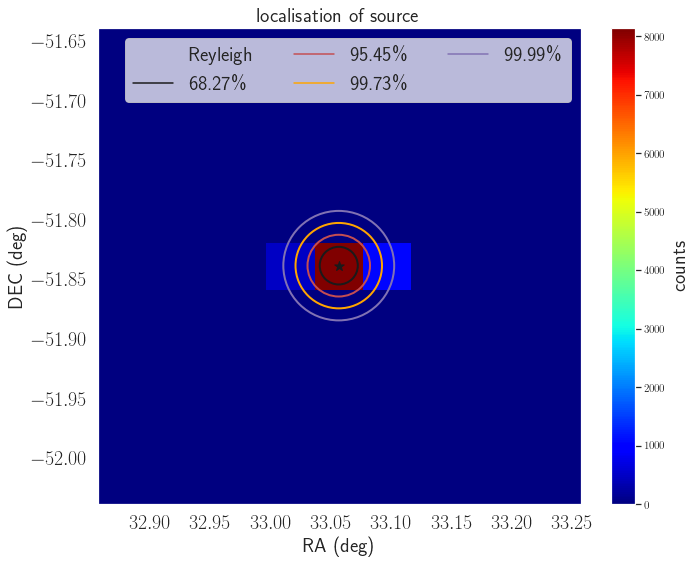

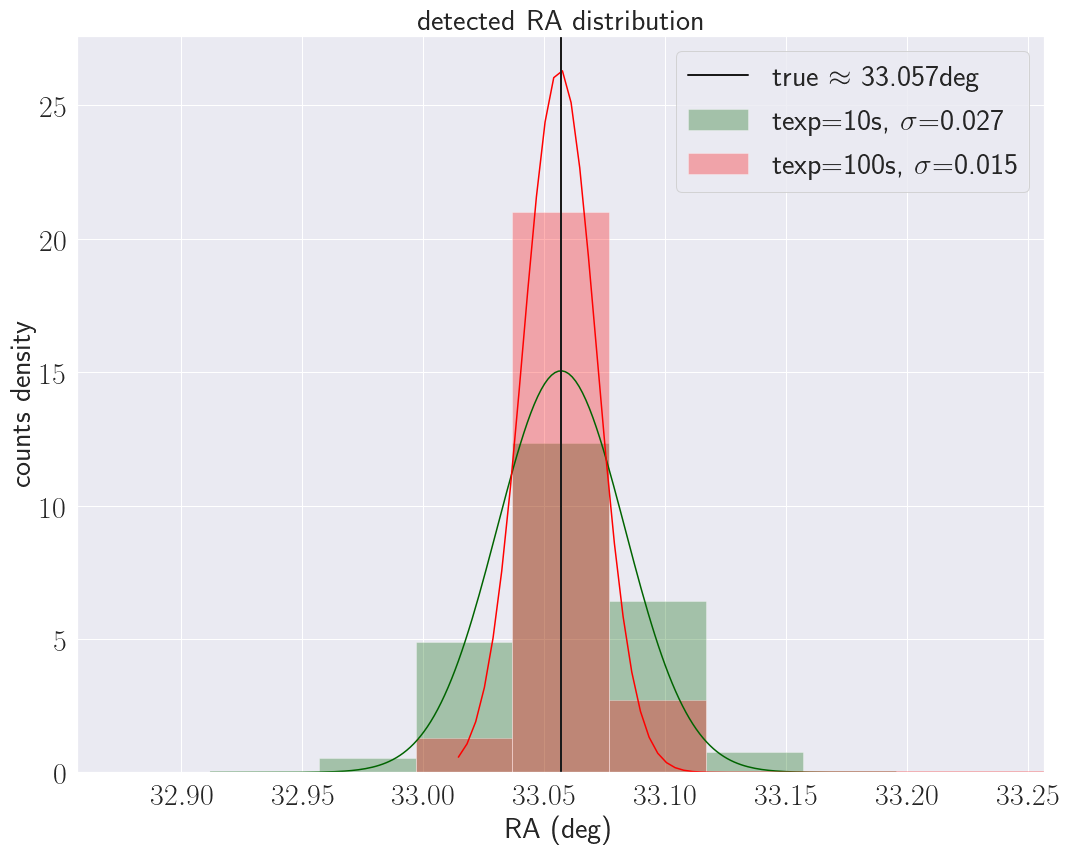

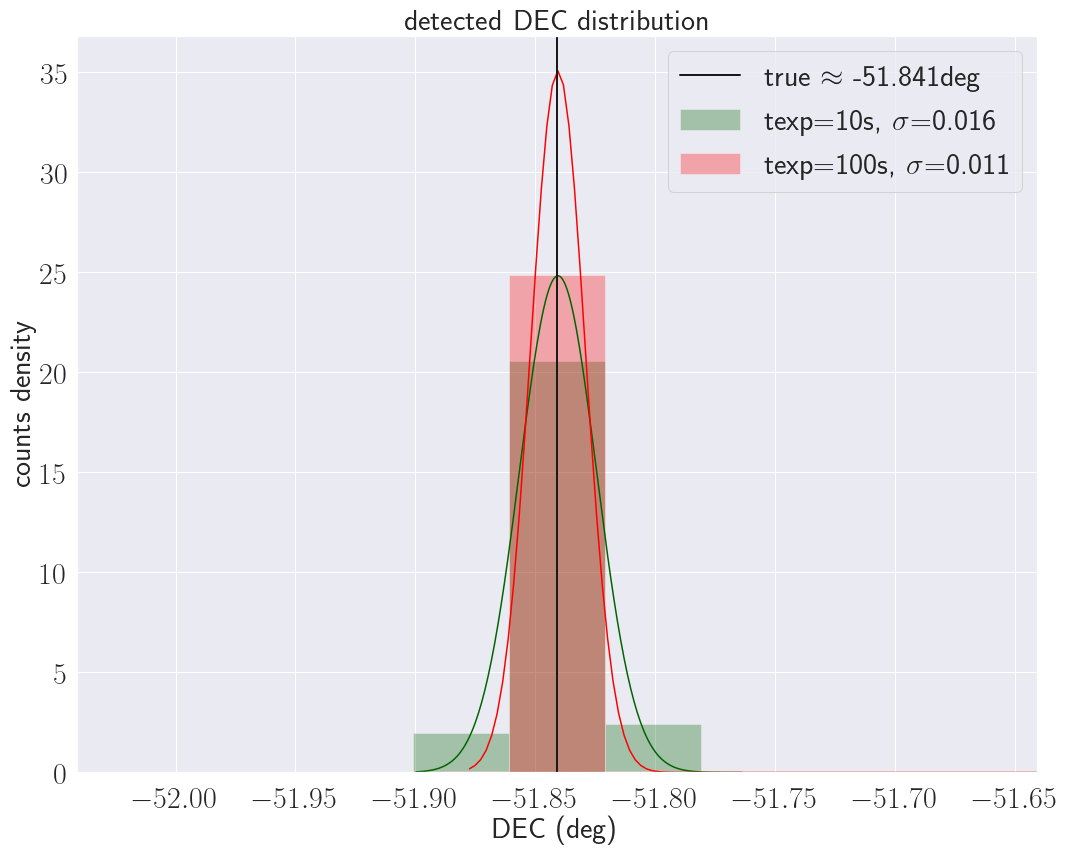

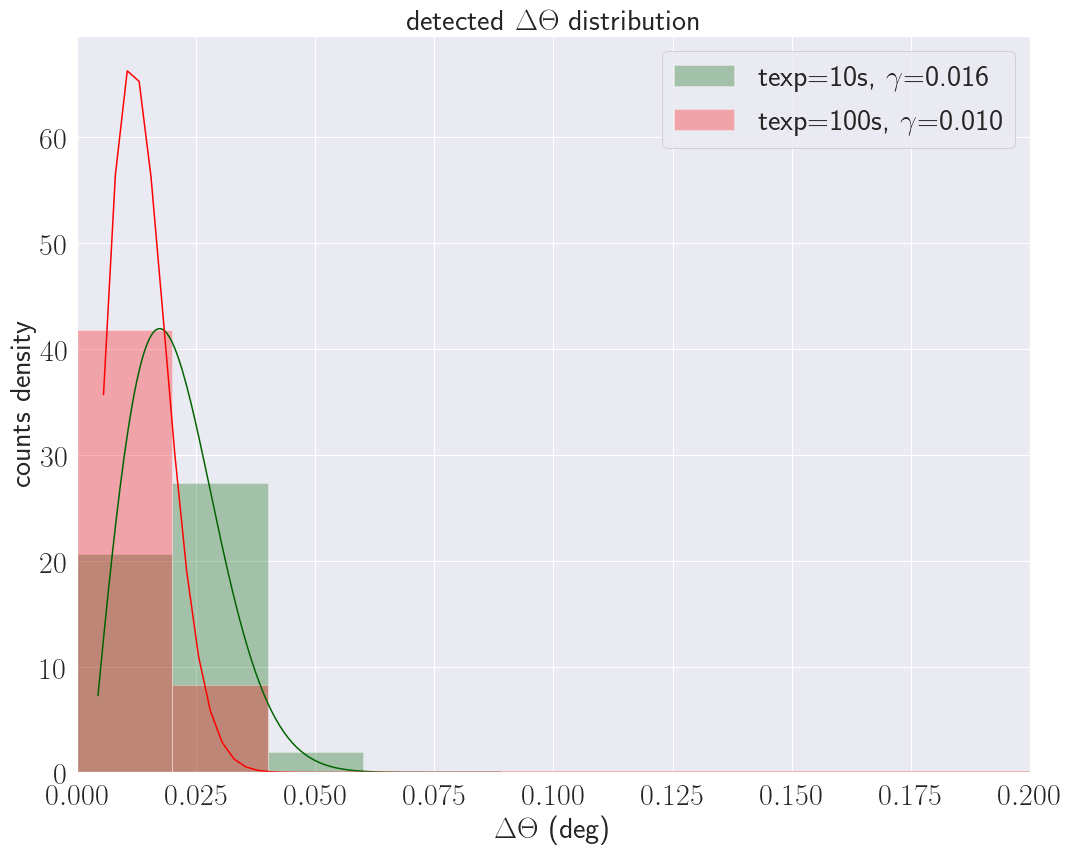

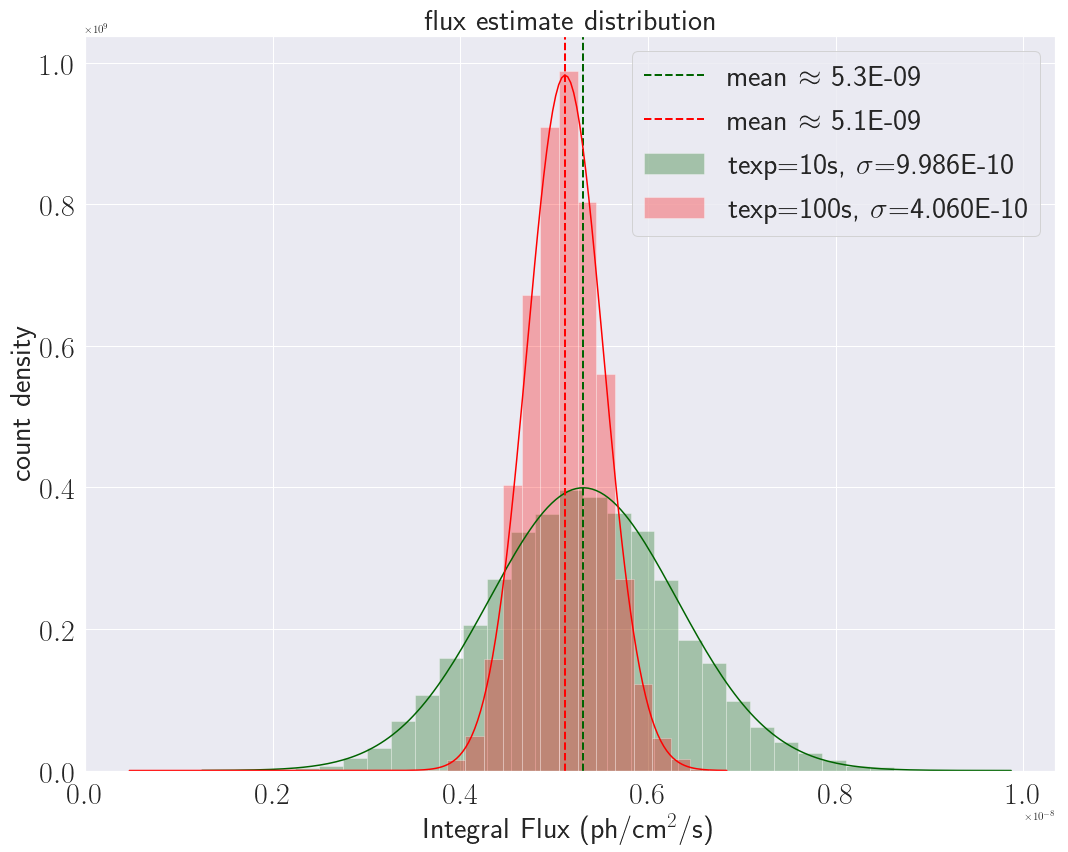

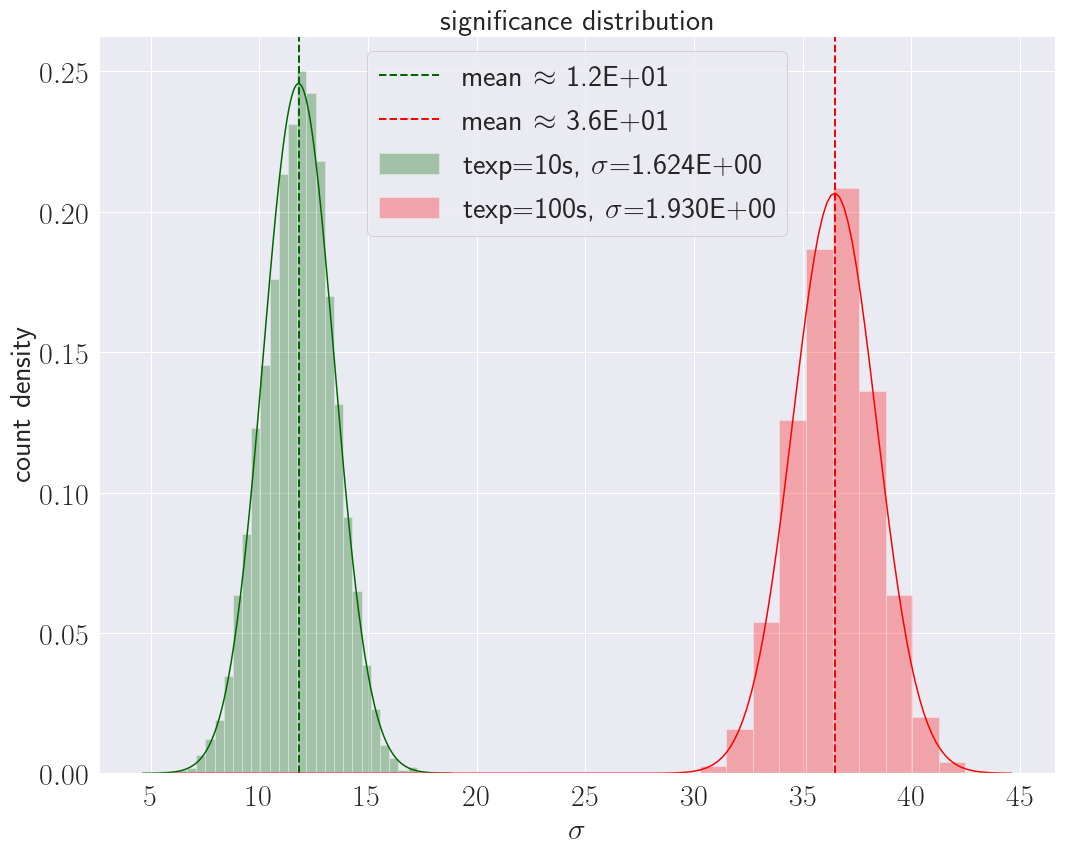

done plotting

tesi_final_1e4_degraded_tmin90s50s_flux2/
data_10s.csv

================ texp = 10s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  9184
! NaN DETECTION RATE : 8.159999999999997 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 78.93 %
~ ra det mean: 33.05851075983036 ra det std: 0.037694804058387966
~ dec det mean: -51.84004376366239 dec det std: 0.023227336260722594
~ pos det mean: 0.028838230531044517 pos det gamma: 0.023277787249963804
~ flux fit mean: 2.815606736258608e-09 flux fit std: 6.522497683931048e-10
~ ts fit mean: 7.640833901956724 ts fit std: 1.29905495049341


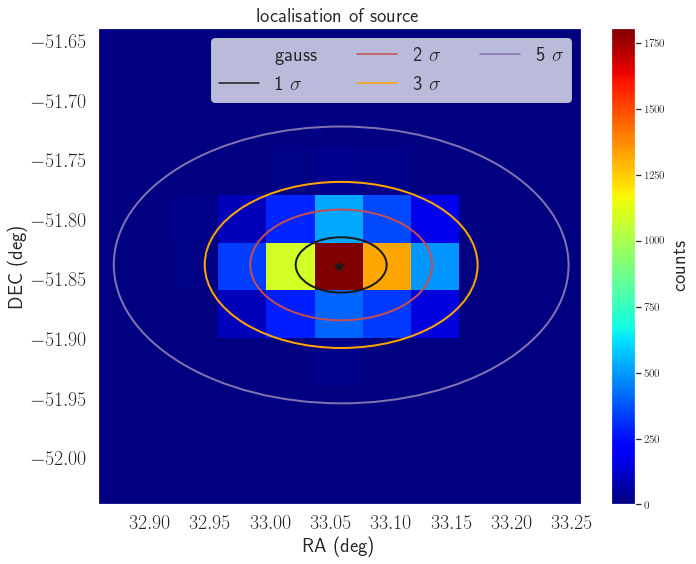

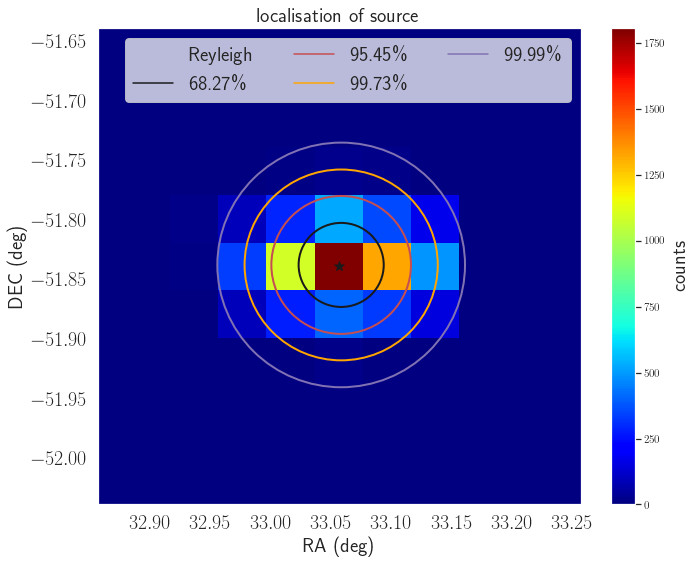

data_100s.csv

================ texp = 100s ==============

* verify trials =  10000
* drop duplicate => trials =  10000
* drop nan => trials =  10000
! NaN DETECTION RATE : 0.0 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 98.72999999999999 %
~ ra det mean: 33.05756292872825 ra det std: 0.02093641754224166
~ dec det mean: -51.84030098424045 dec det std: 0.013384216083856253
~ pos det mean: 0.016211076786504557 pos det gamma: 0.013174641629835154
~ flux fit mean: 2.5832123282174262e-09 flux fit std: 3.112556842393077e-10
~ ts fit mean: 22.719077555224338 ts fit std: 1.866548510253522


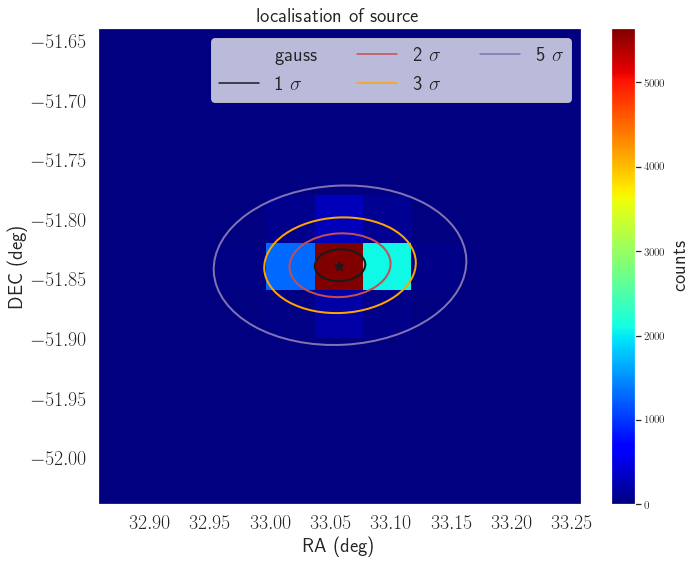

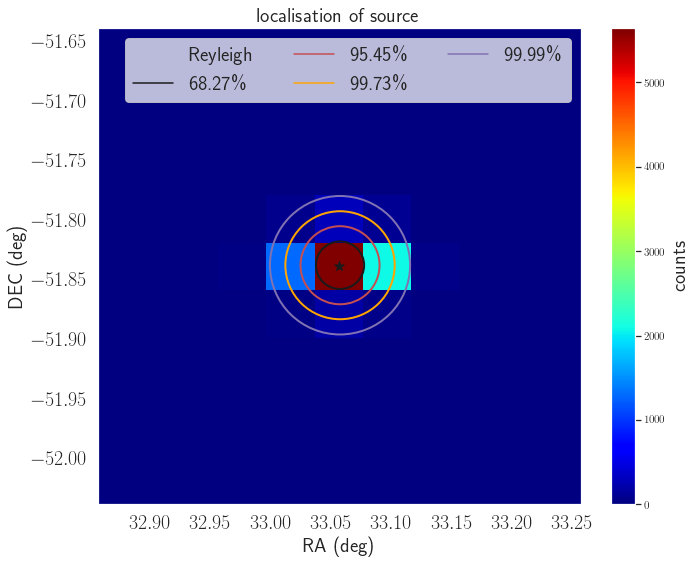

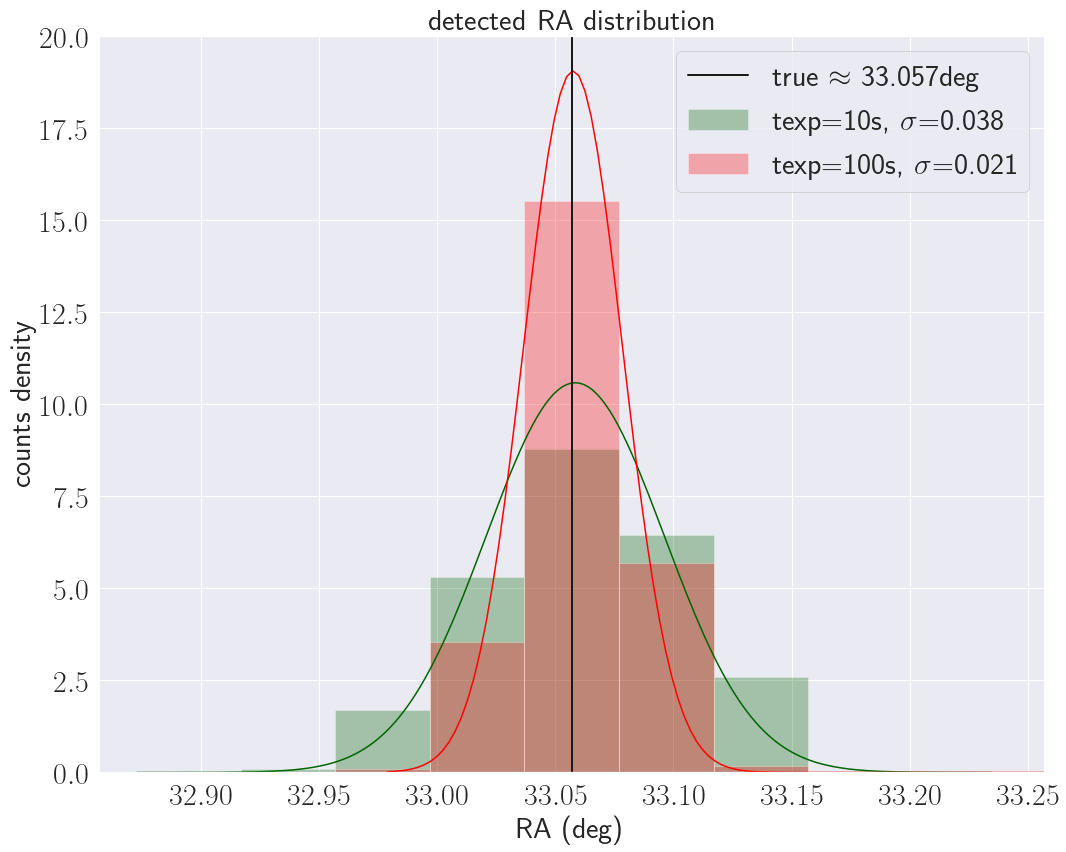

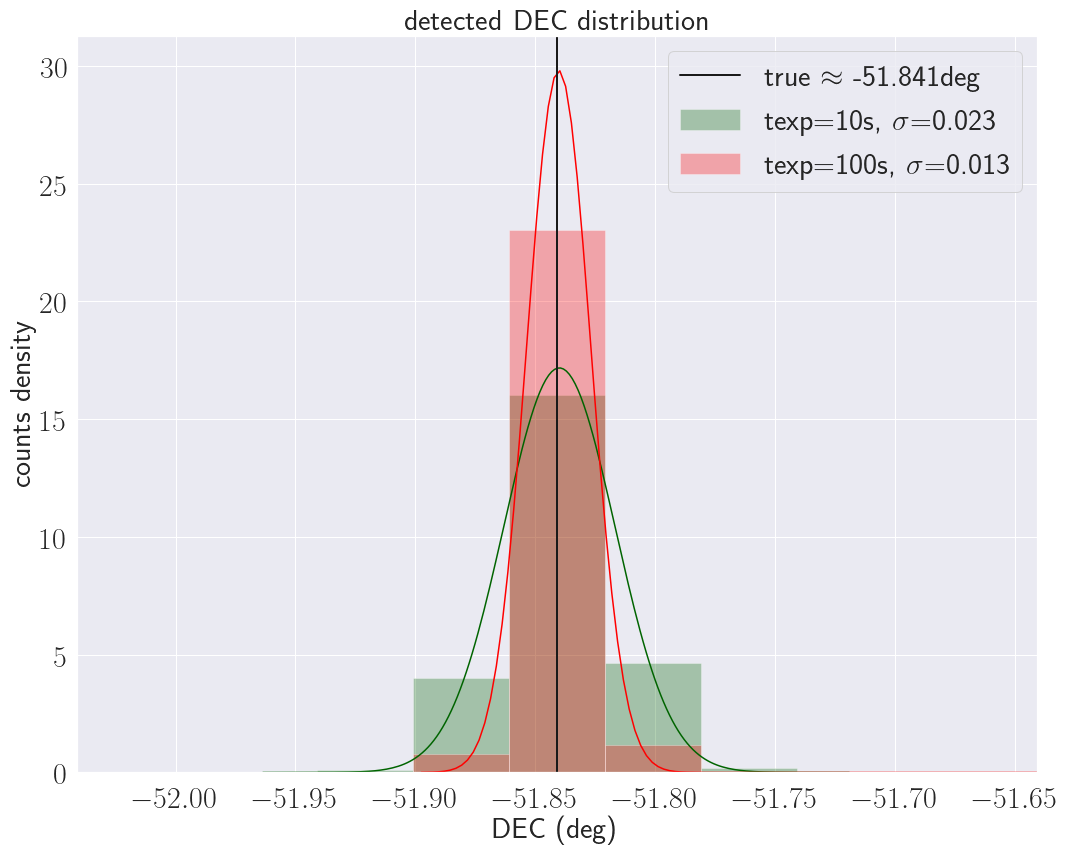

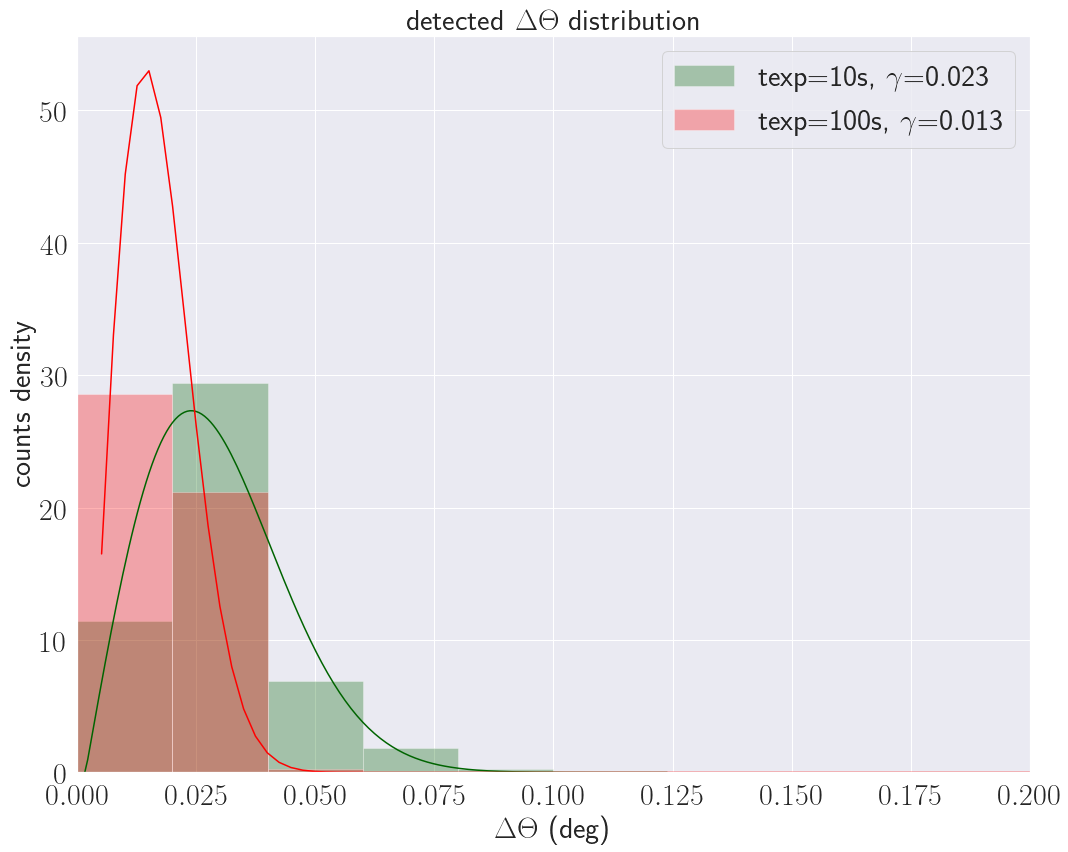

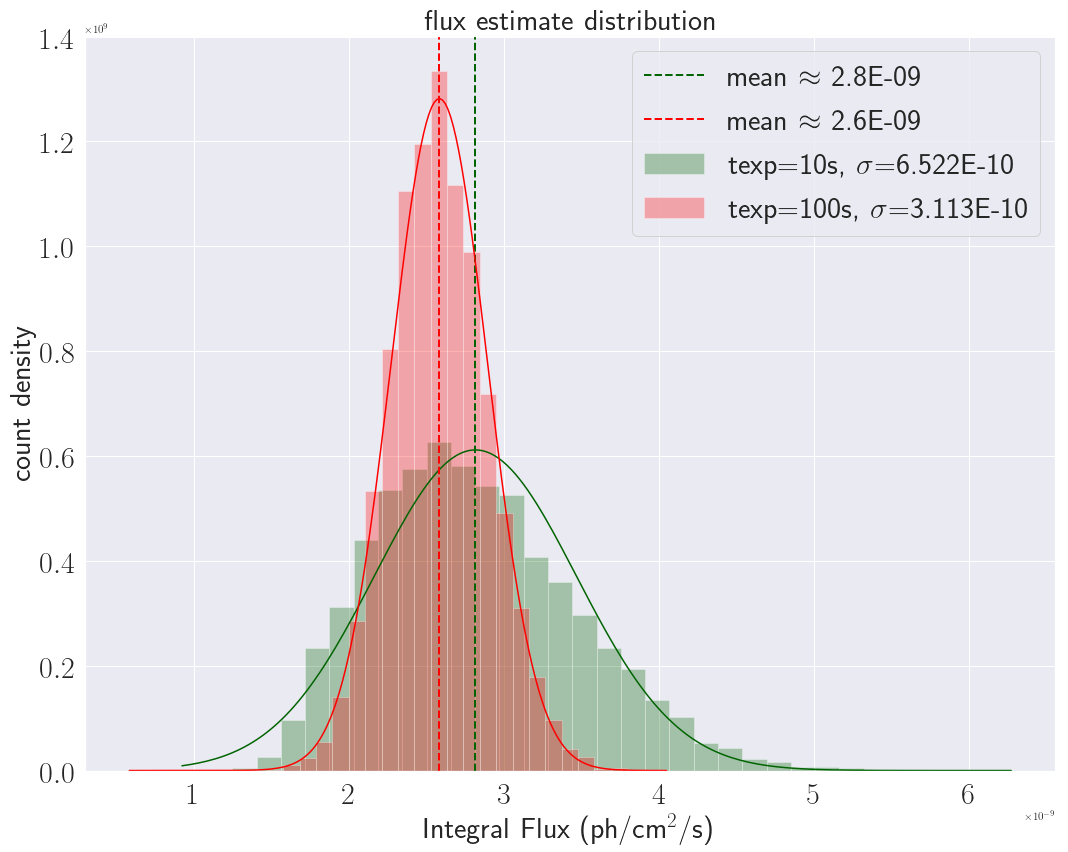

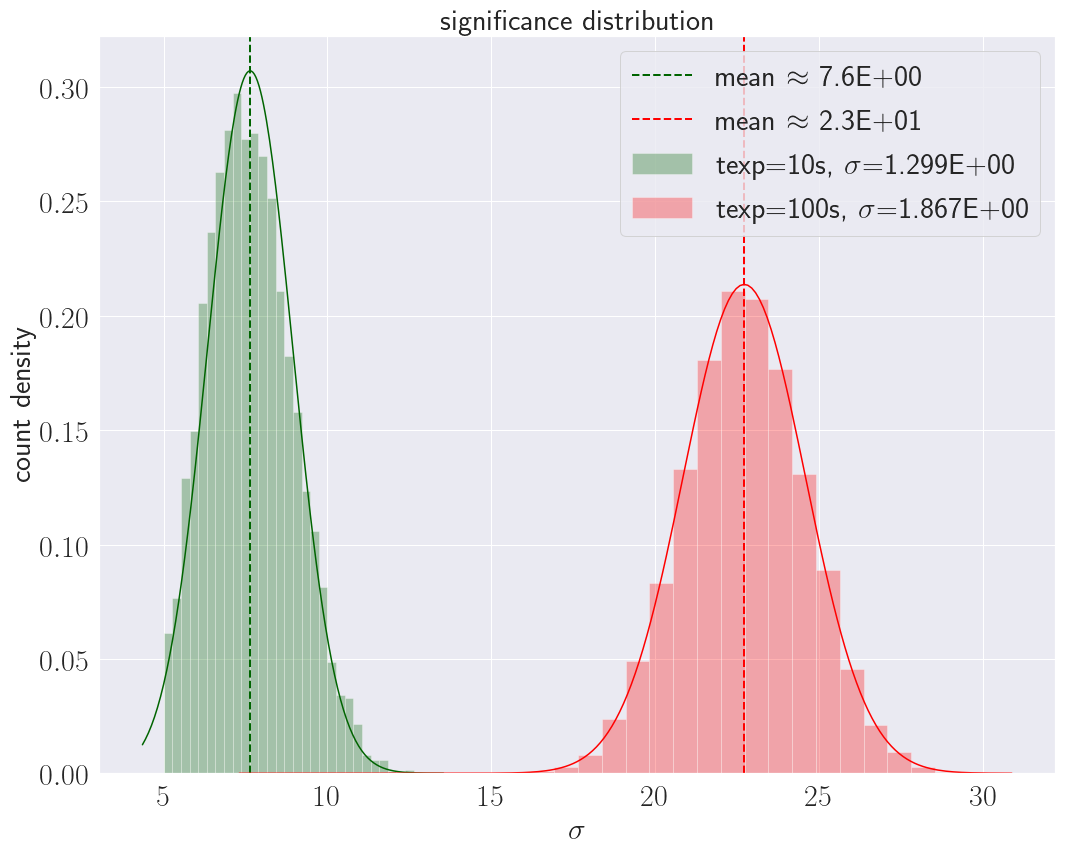

done plotting

tesi_final_1e4_degraded_tmin90s50s_flux3/
data_10s.csv

================ texp = 10s ==============

* verify trials =  10001
* drop duplicate => trials =  10000
* drop nan => trials =  6397
! NaN DETECTION RATE : 36.029999999999994 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 32.379999999999995 %
~ ra det mean: 33.05818739804951 ra det std: 0.043192640373461134
~ dec det mean: -51.839622153754505 dec det std: 0.026467653593963626
~ pos det mean: 0.03288826022142481 pos det gamma: 0.02660035667727389
~ flux fit mean: 2.2309753000252363e-09 flux fit std: 4.667468950318959e-10
~ ts fit mean: 6.5505808587565815 ts fit std: 0.9609722269894476


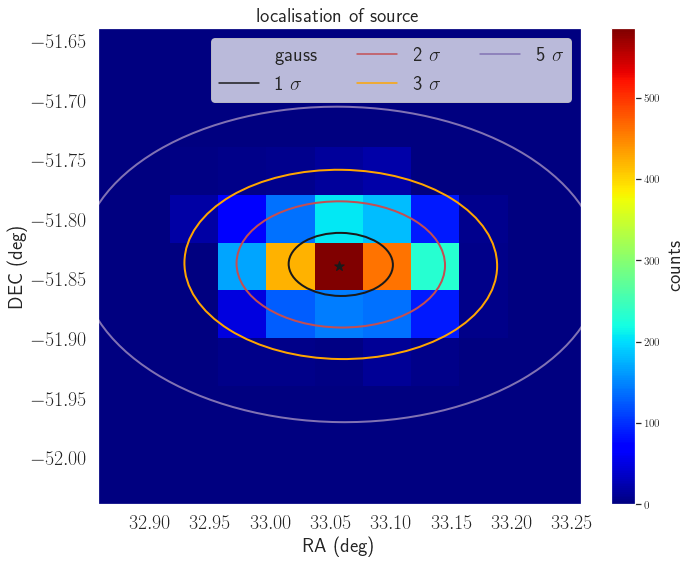

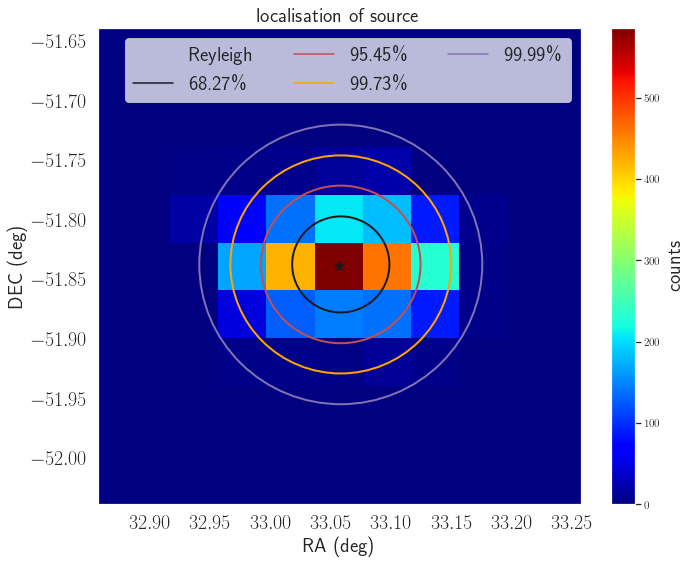

data_100s.csv

================ texp = 100s ==============

* verify trials =  10001
* drop duplicate => trials =  10000
* drop nan => trials =  9832
! NaN DETECTION RATE : 1.6800000000000068 %
! DET RATIO WITHIN 0.5deg FROM TRUE POSITION: 94.04 %
~ ra det mean: 33.05790821877649 ra det std: 0.029253516548795298
~ dec det mean: -51.83981439009966 dec det std: 0.017578755752663933
~ pos det mean: 0.021097588357298528 pos det gamma: 0.01785021843621717
~ flux fit mean: 1.7421814423464815e-09 flux fit std: 2.6926880268535947e-10
~ ts fit mean: 17.101277760797807 ts fit std: 1.8601523799364654


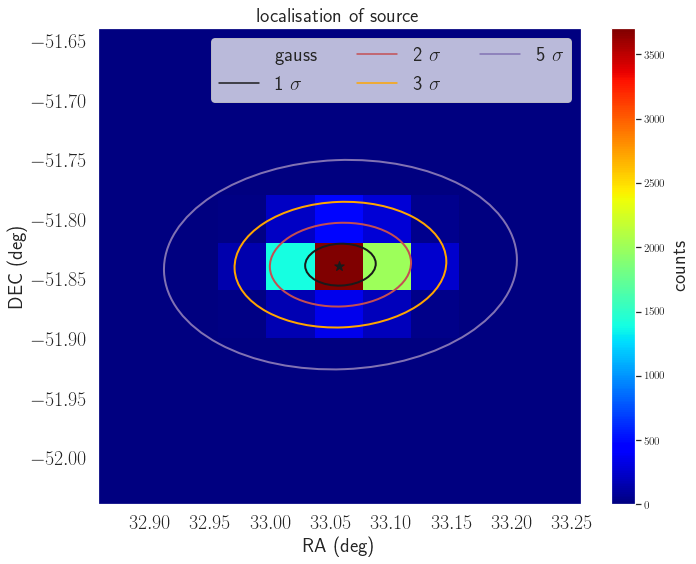

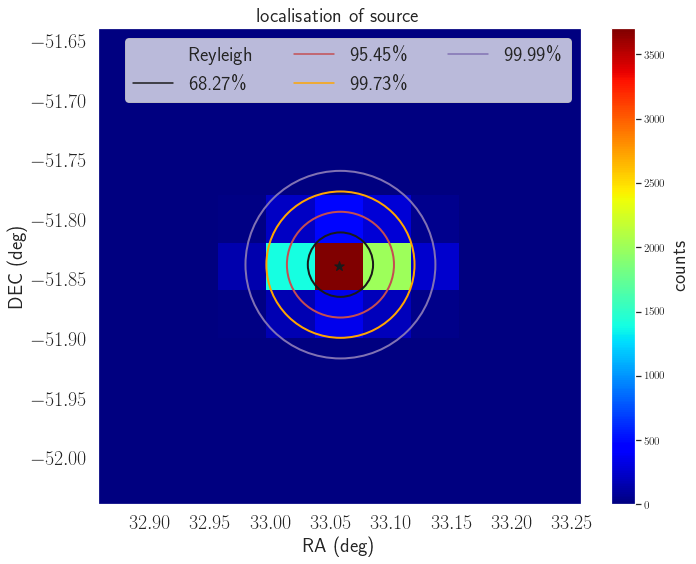

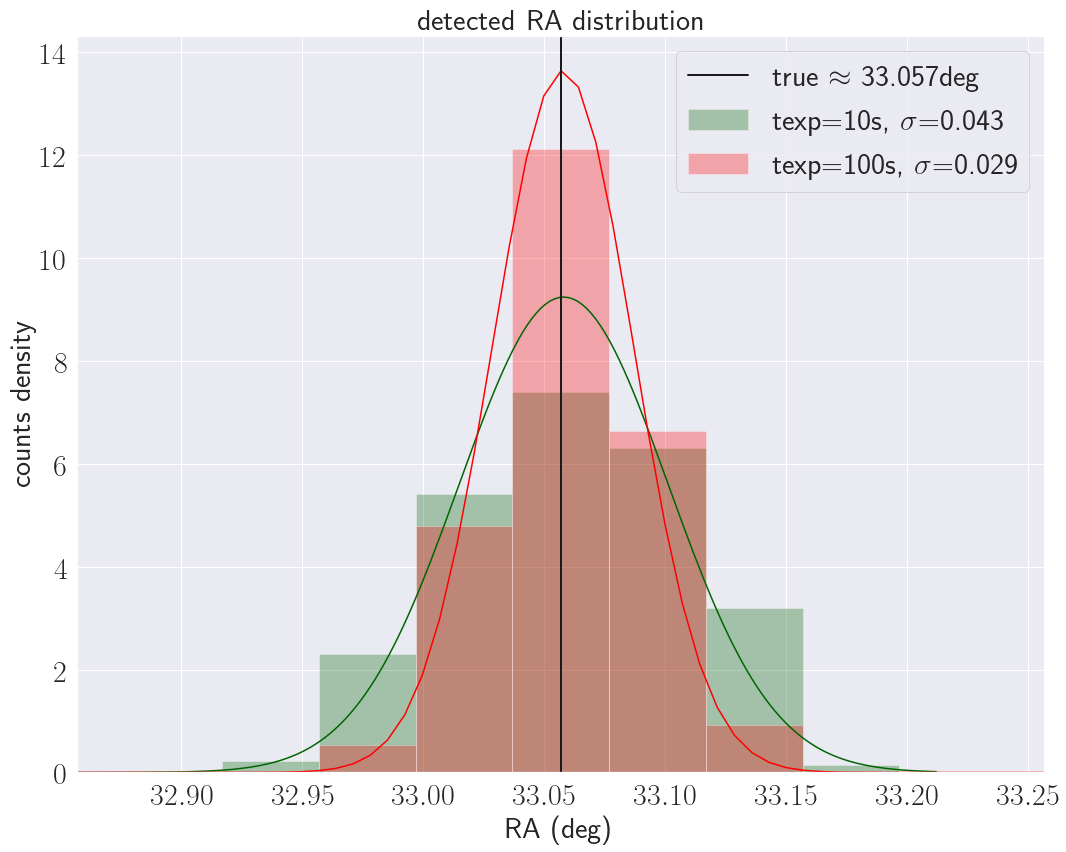

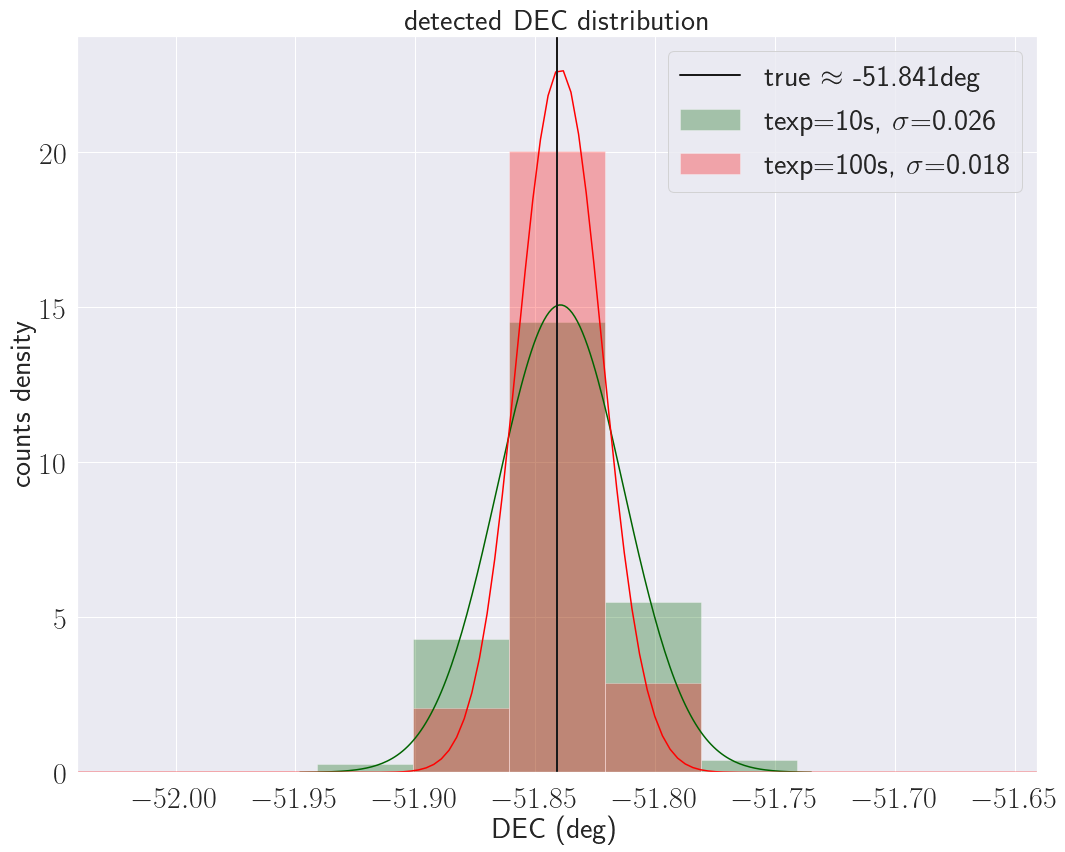

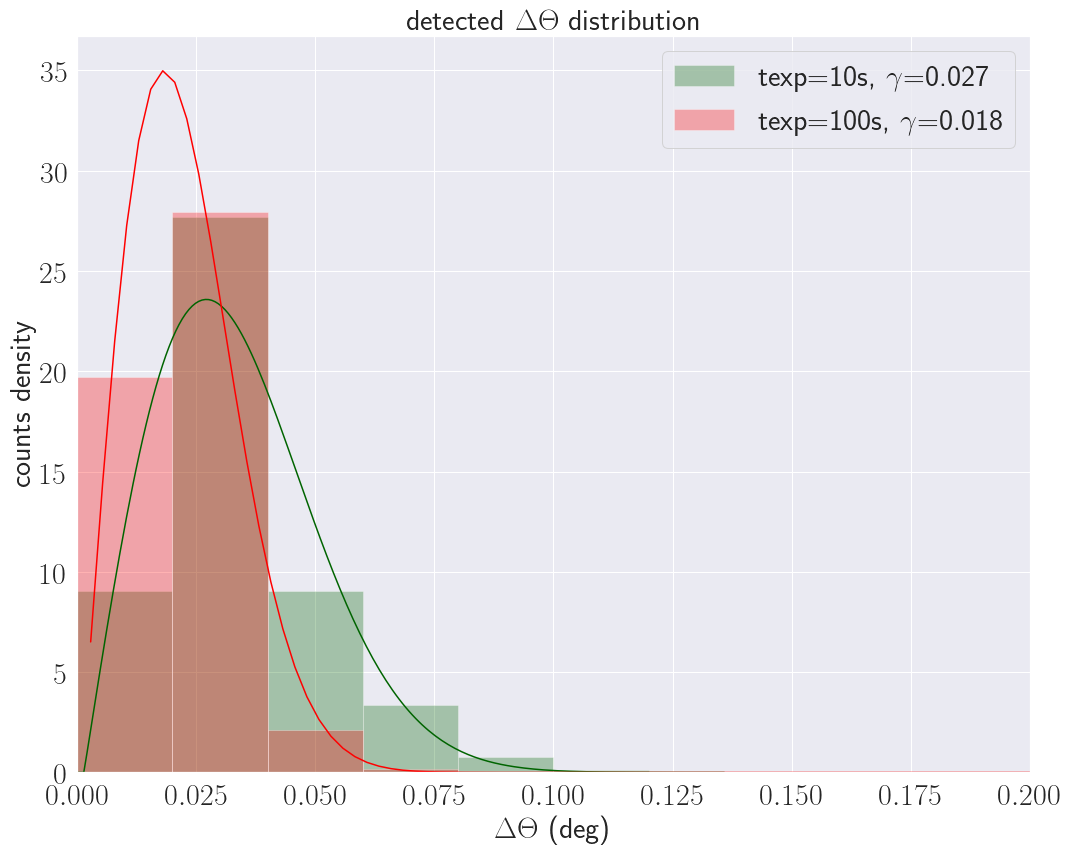

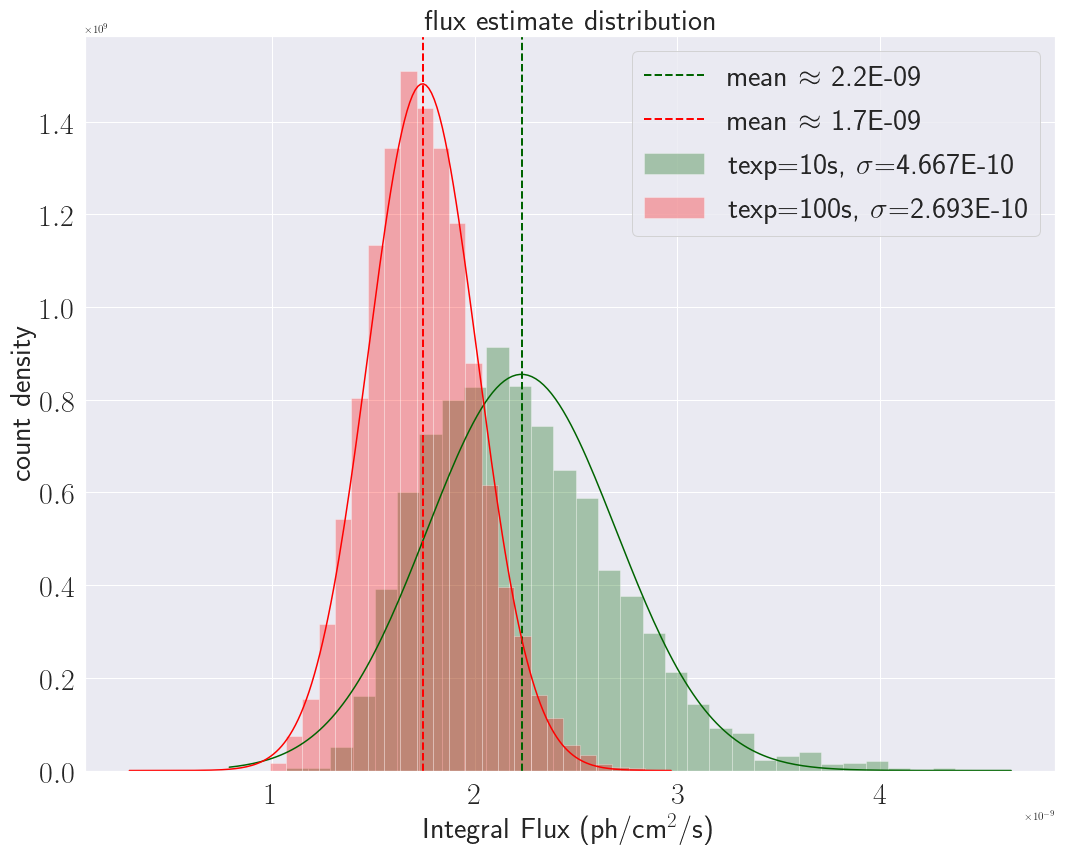

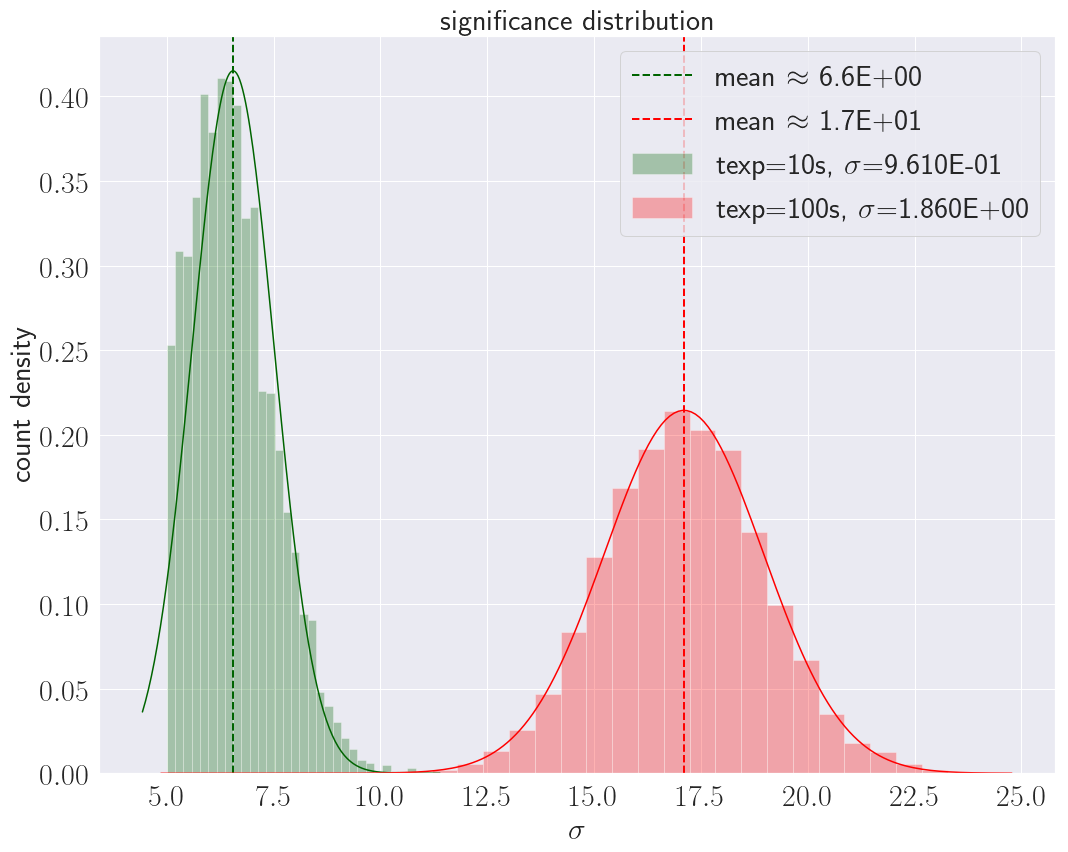

done plotting
done


In [15]:
# ======================
# !!! ALL TEXP PLOTS !!!
# ======================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from scipy.stats import rayleigh, norm
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse, Circle, Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
sys.path.append('/home/ambra/Desktop/cluster-morgana/')
from module_statistics import *
from statistics import mean

for index, f in enumerate(folders):
    print('\n' + f)
    path = directory + f + 'run0406/run0406_ID000126/csv/'
    png_path = directory + f + 'png/'
    if not os.path.isdir(png_path):
        os.mkdir(png_path)

    list_ra, list_dec, list_pos = ([] for j in range(3))
    list_mode_pos, list_mean_ra, list_mean_dec, list_mean_pos = ([] for j in range(4))
    list_std_ra, list_std_dec = ([] for j in range(2))
    list_flux, list_mean_flux, list_std_flux = ([] for j in range(3))
    list_ts, list_mean_ts, list_std_ts = ([] for j in range(3))
    flux_threshold = []
    
    for n in range(len(texp)) :  
        # store values ---!
        filename = csvMerged[n].replace('run0406_', 'data_')
        print(filename)
        print('\n================ texp = %ds ==============\n' %texp[n])

        # load DataFrame and column names ---!
        df = pd.read_csv(path+filename)
        cols = list(df.columns)
        trials = len(df[cols[0]])
        print('* verify trials = ', trials)  
        # drop duplicates ---! 
        df.sort_values(cols[0], inplace = True) 
        # dropping ALL duplicte values 
        df.drop_duplicates(subset=cols[0], keep='last', inplace=True) 
        trials = len(df[cols[0]])
        print('* drop duplicate => trials = ', trials) 
        total = trials
        # drop NaN ---!
        df = df.dropna()
        trials = len(df[cols[0]])
        df = df.reindex(np.arange(trials))
        print('* drop nan => trials = ', trials)  
        # set arrays ---!
        # 0      1     2      3     4     5       6        7       8        9        10/-1  
        # trial, texp, sigma, Ndet, Nsrc, RA_det, DEC_det, RA_fit, DEC_fit, flux_ph, TS
        ts = np.array(df[cols[-1]]) 
        trials = len(ts)
        df = df.reindex(np.arange(trials))
        perc = 100 * (trials/total)
        print('! NaN DETECTION RATE :', 100-perc, '%')

        trial = np.array(df[cols[0]])
        raDet = np.array(df[cols[5]])
        decDet = np.array(df[cols[6]])
        flux = np.array(df[cols[9]])
        ts = np.sqrt(np.array(df[cols[-1]]))

        # DETECTION ---!
        distance_det = []
        d_det = []
        ra_det = []
        dec_det = []
        flux_fit = []
        ts_fit = []

        for i in range(len(raDet)) :
            if ts[i]>ts_threshold:
                if -90 <= decDet[i] and decDet[i] <= 90 and 0 <= raDet[i] and raDet[i] <= 360 :
                    det_coord = SkyCoord(ra = raDet[i]*u.deg, dec = decDet[i]*u.deg, frame='fk5')
                    dist = float(true_coord.separation(det_coord).deg)
                    distance_det.append(dist)                  

                    if dist <= threshold:
                        d_det.append(dist)
                        ra_det.append(raDet[i]) 
                        dec_det.append(decDet[i]) 
                        flux_fit.append(flux[i])
                        ts_fit.append(ts[i])
                    
        perc_det = len(d_det)/total * 100
        print('! DET RATIO WITHIN %.1fdeg FROM TRUE POSITION:' %threshold, perc_det, '%')

        # MEAN DET ---!
        mean_raDet = np.nanmean(ra_det)
        std_raDet = np.nanstd(ra_det)
        mean_decDet = np.nanmean(dec_det)
        std_decDet = np.nanstd(dec_det)
        mean_posDet = np.nanmean(d_det)

        tmp = 0
        for i in range(len(d_det)) :
            tmp += d_det[i]**2

        if len(d_det) != 0.0 :
            mode_det = np.sqrt(1/(2*len(d_det)) * tmp)   
            MLE_det = 0.606/mode_det
        else:
            mode_det = np.nan
            MLE_det = np.nan

        print('~ ra det mean:', mean_raDet, 'ra det std:', std_raDet)
        print('~ dec det mean:', mean_decDet, 'dec det std:', std_decDet)
        print('~ pos det mean:', mean_posDet, 'pos det gamma:', mode_det)


        # MAX LIKELIHOOD ---! 
        mean_ts = np.nanmean(ts_fit)
        std_ts = np.nanstd(ts_fit)   
        mean_flux = np.nanmean(flux_fit)
        std_flux = np.nanstd(flux_fit)

        print('~ flux fit mean:', mean_flux, 'flux fit std:', std_flux)
        print('~ ts fit mean:', mean_ts, 'ts fit std:', std_ts)
        
        mappage(ra_det, dec_det, mode_det, trueRA, trueDEC, texp[n])
    
        list_ra.append(ra_det)
        list_dec.append(dec_det)
        list_pos.append(d_det)
        list_flux.append(flux_fit)
        list_ts.append(ts_fit)
        list_mean_ra.append(mean_raDet)
        list_mean_dec.append(mean_decDet)
        list_mean_pos.append(mean_posDet)
        list_mean_flux.append(mean_flux)
        list_mean_ts.append(mean_ts)
        list_std_ra.append(std_raDet)
        list_std_dec.append(std_decDet)
        list_mode_pos.append(mode_det)
        list_std_flux.append(std_flux)
        list_std_ts.append(std_ts)
        flux_threshold.append(mean_flux-np.min(flux_fit))
        flux_threshold.append(np.max(flux_fit)-mean_flux)
        
    # gathered per flux
    if len(list_ts) > 0:
        plottage(texp, list_ra, list_dec, list_pos, list_flux, list_mean_flux, list_ts, list_mean_ts,
                 list_std_ra, list_std_dec, list_mode_pos, list_std_flux, list_std_ts,
                 trueRA, trueDEC, png_path)
        print('done plotting')
    else:
        print('never detected above 5 sigma')
print('done')


tesi_final_1e4_nominal_tmin90s50s_flux1/

tesi_final_1e4_nominal_tmin90s50s_flux2/

tesi_final_1e4_nominal_tmin90s50s_flux3/


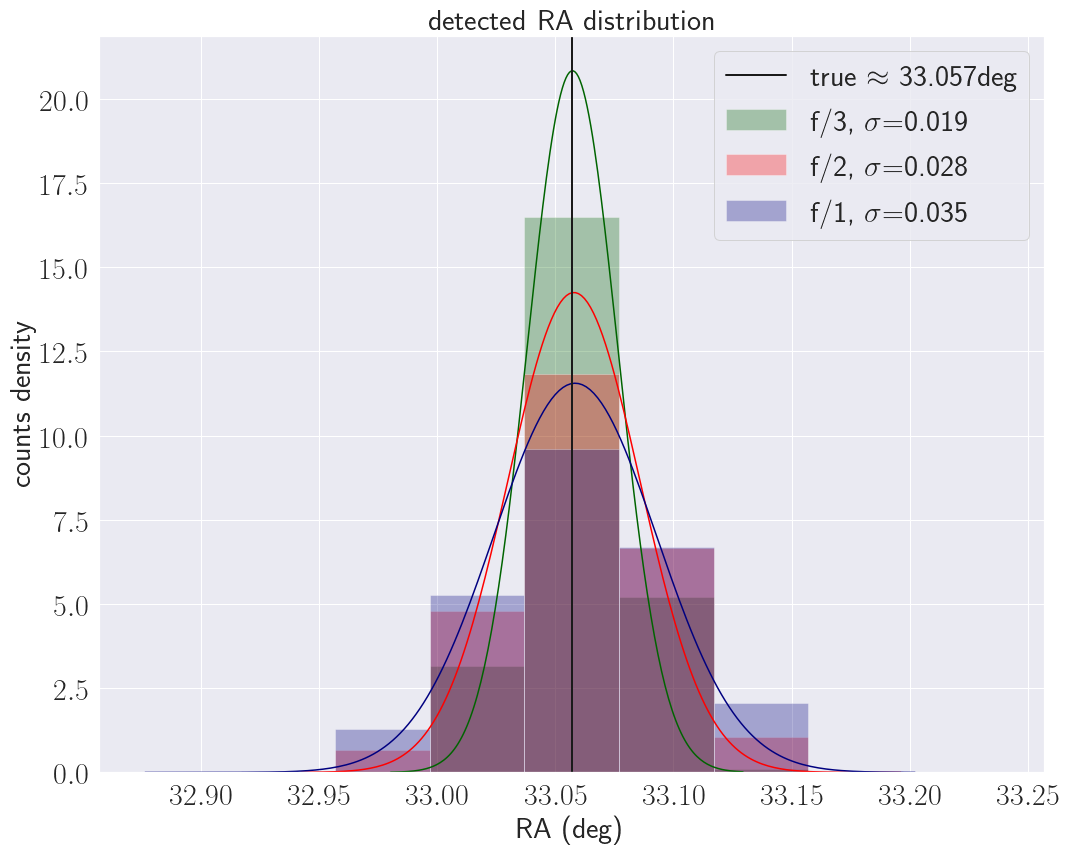

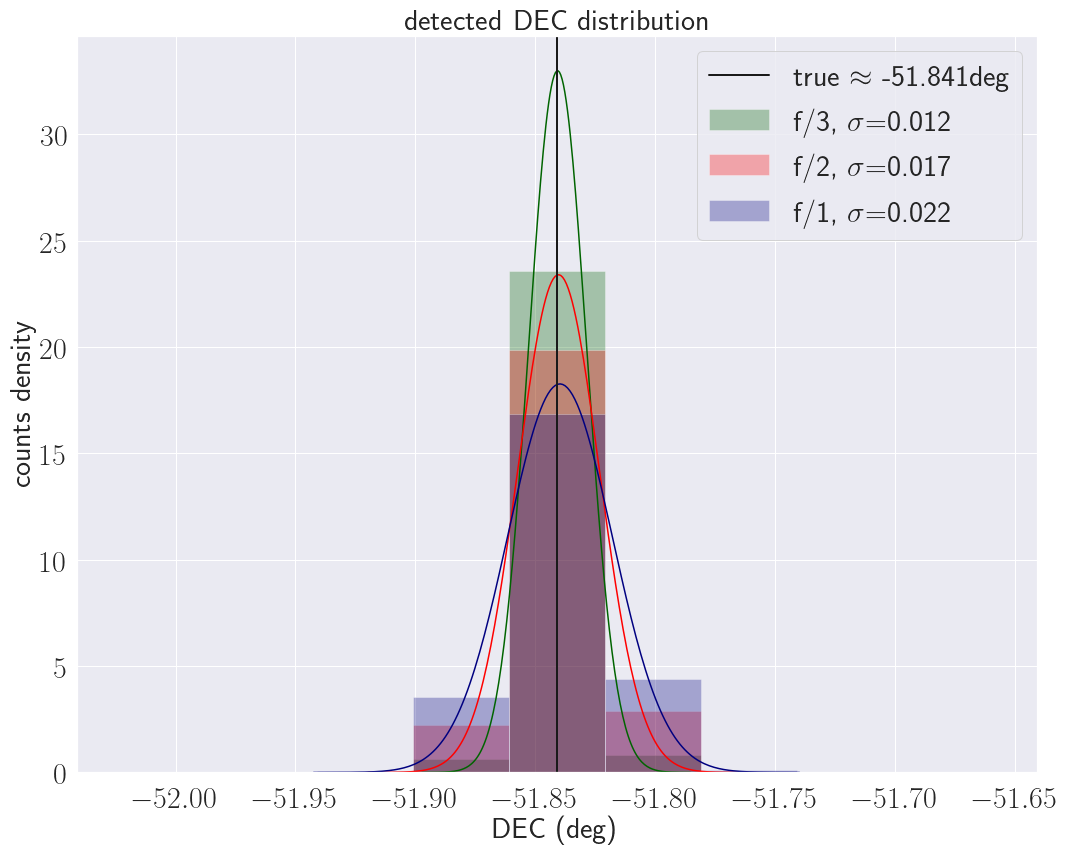

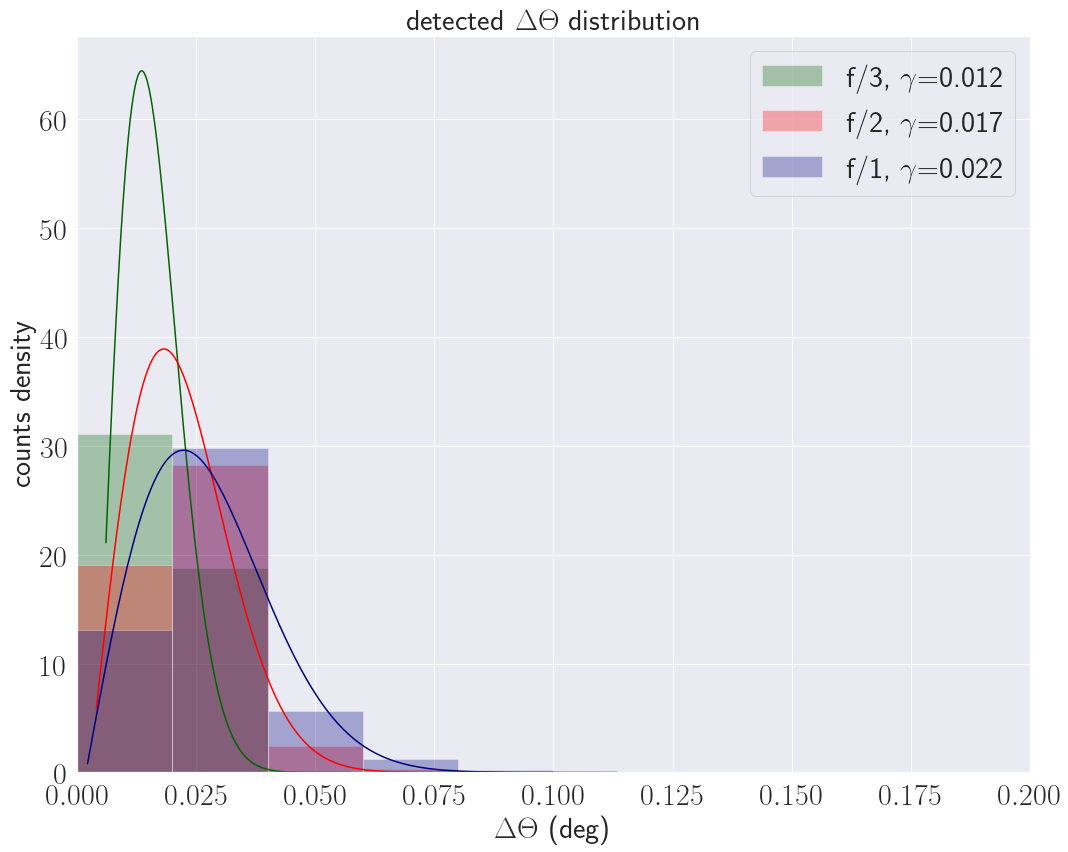

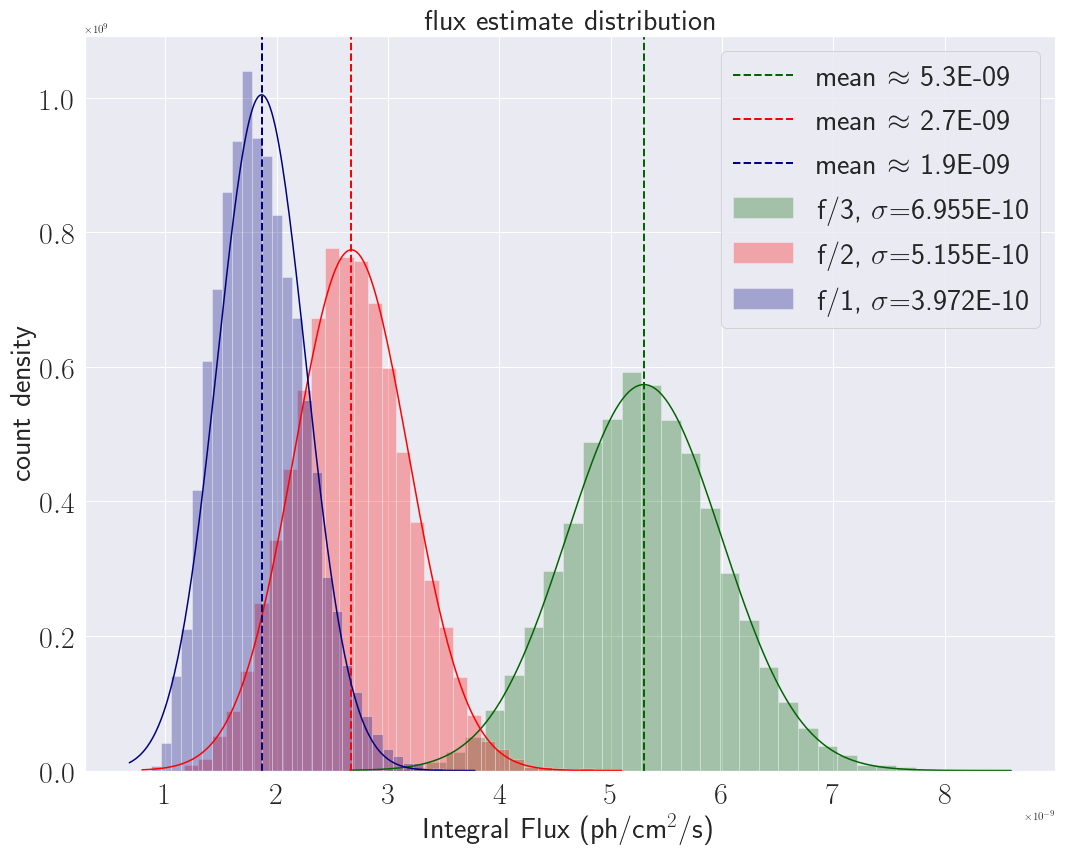

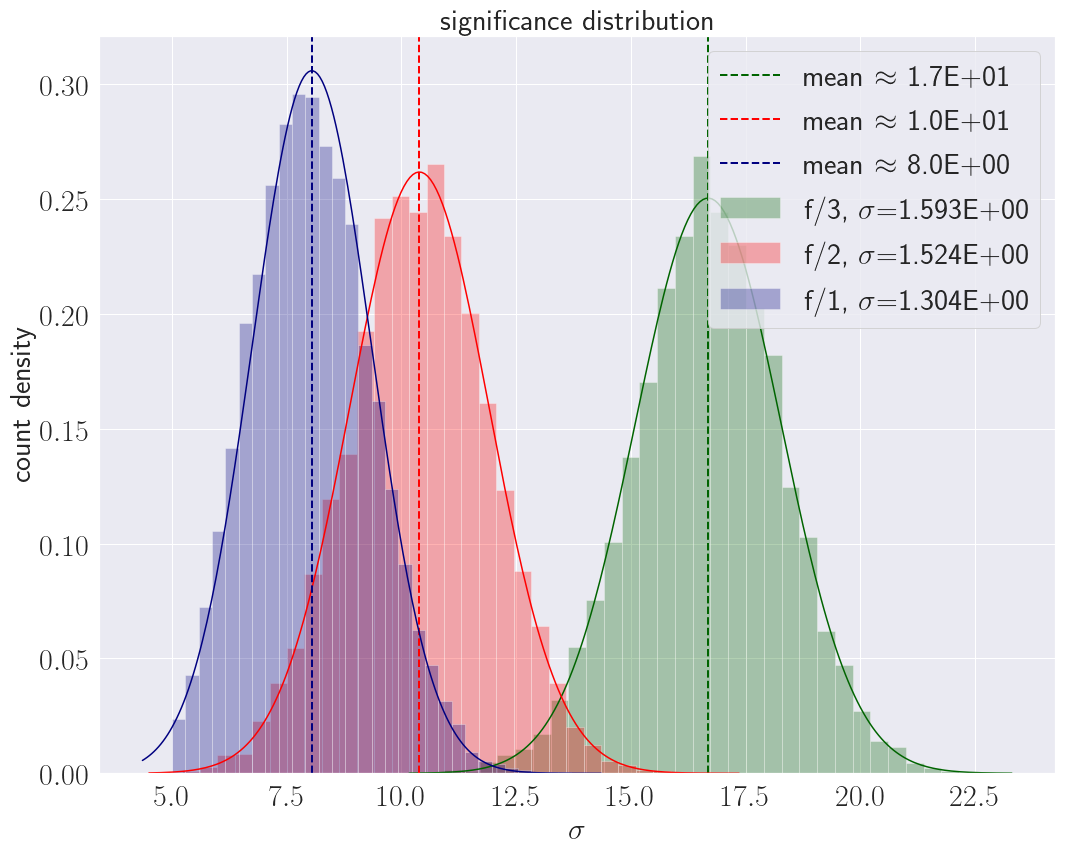

done plotting

tesi_final_1e4_nominal_tmin90s50s_flux1/

tesi_final_1e4_nominal_tmin90s50s_flux2/

tesi_final_1e4_nominal_tmin90s50s_flux3/


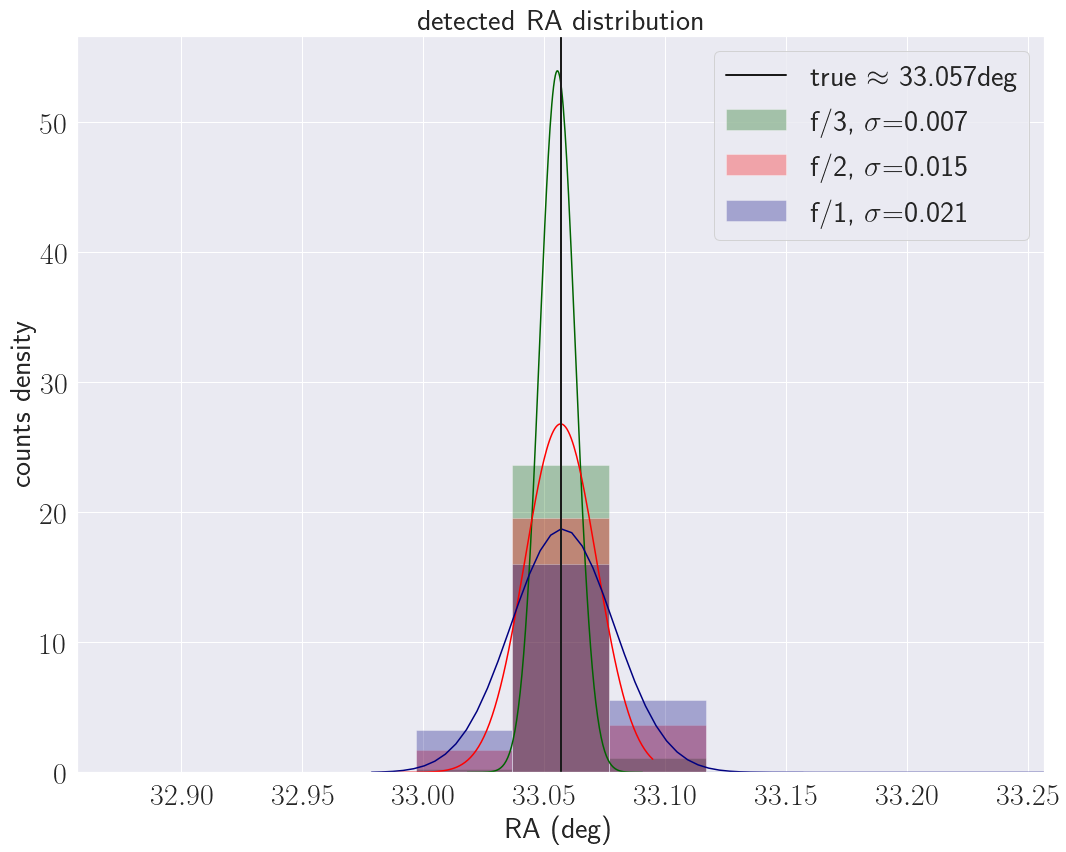

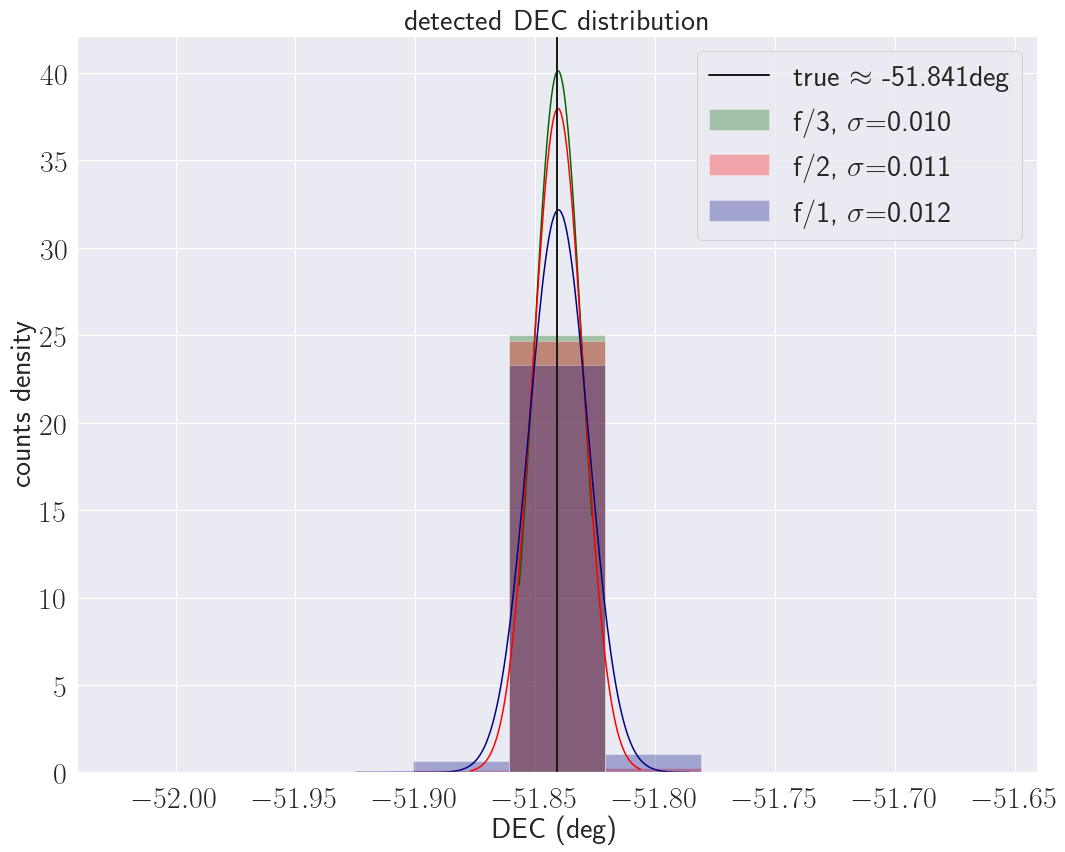

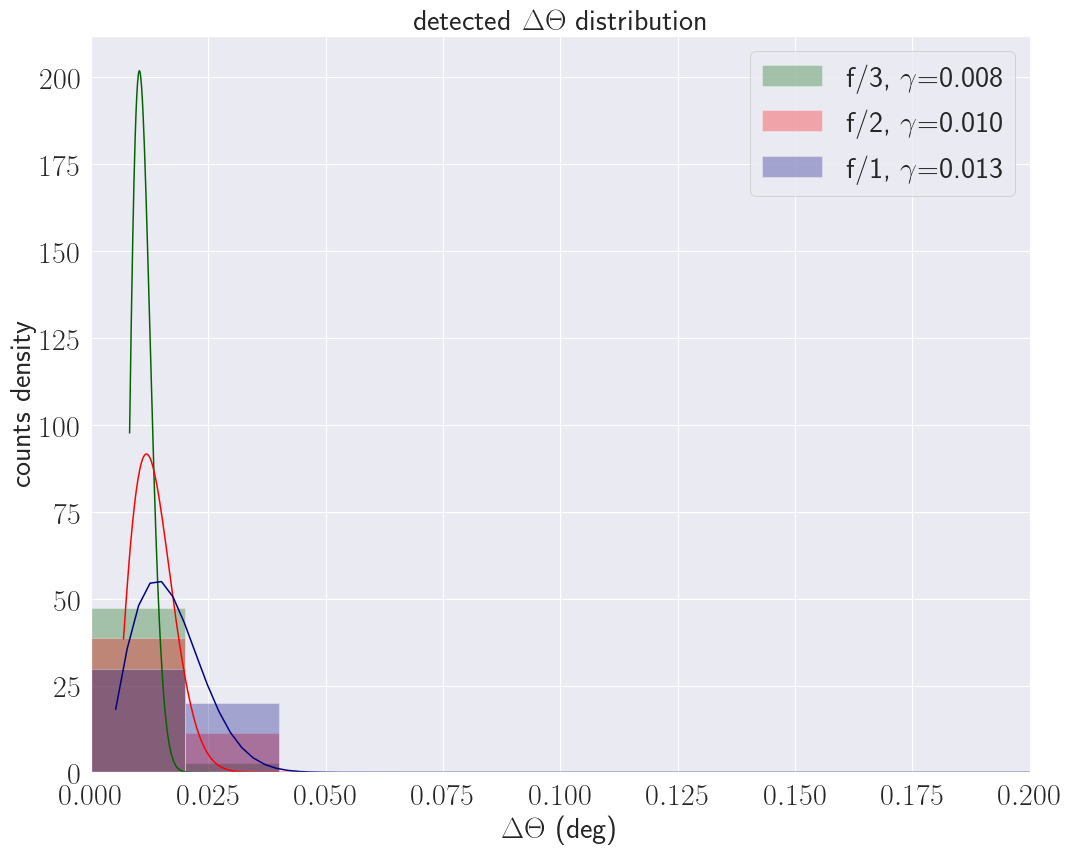

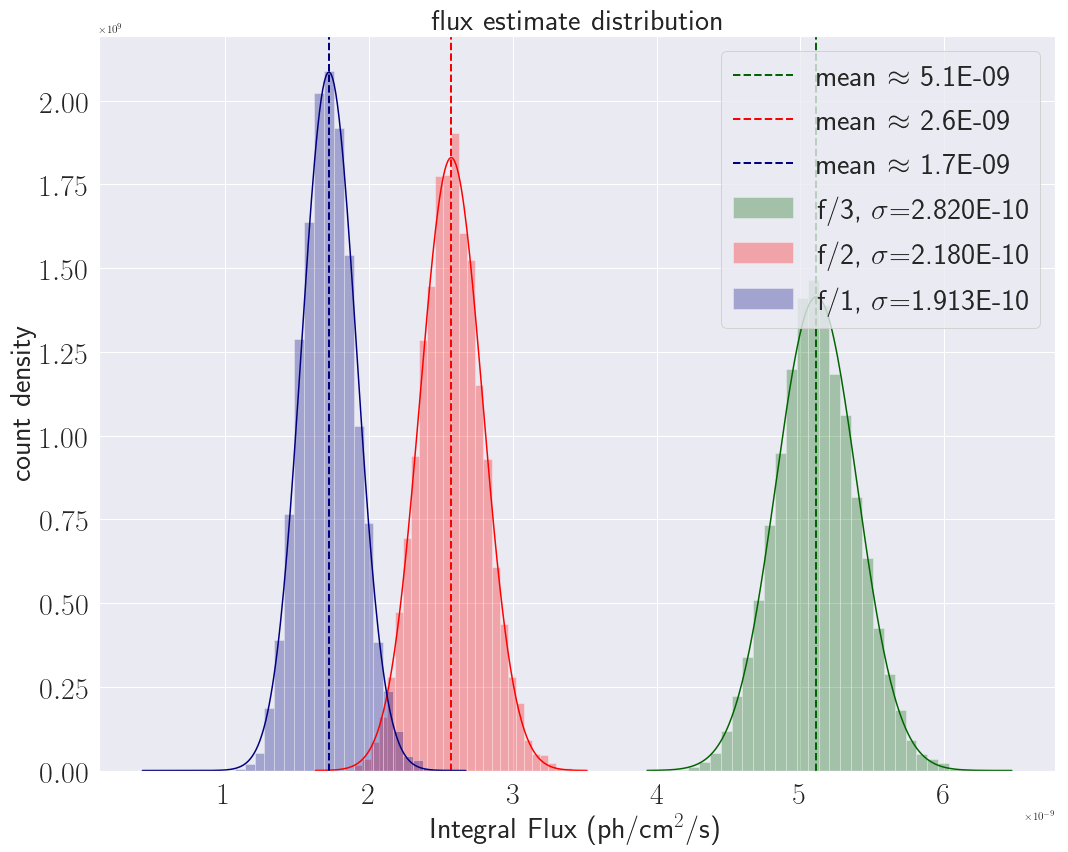

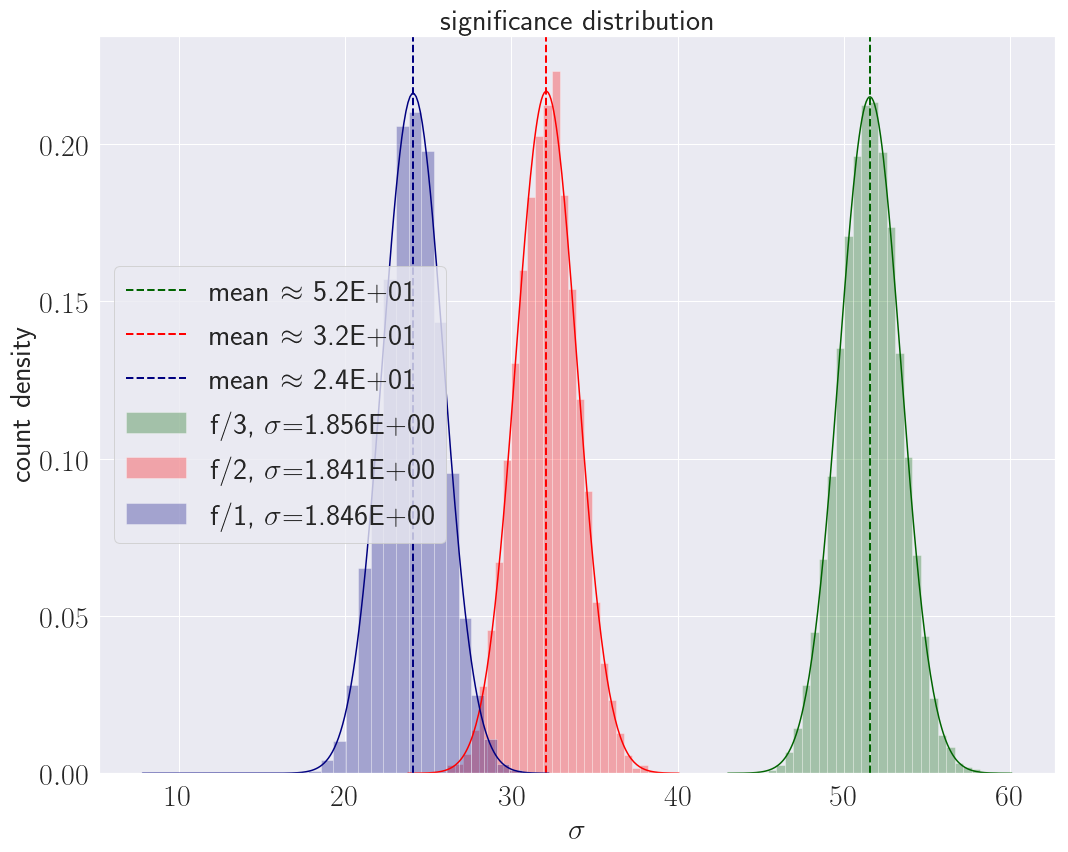

done plotting

tesi_final_1e4_degraded_tmin90s50s_flux1/

tesi_final_1e4_degraded_tmin90s50s_flux2/

tesi_final_1e4_degraded_tmin90s50s_flux3/


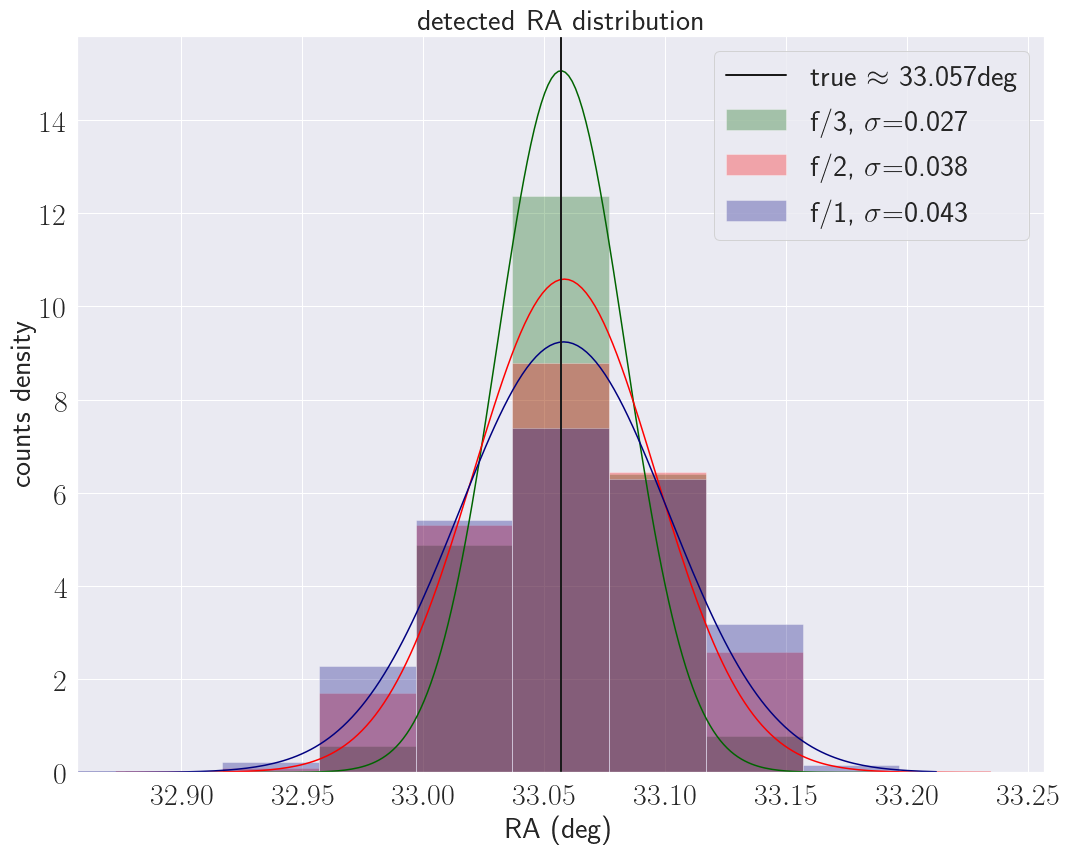

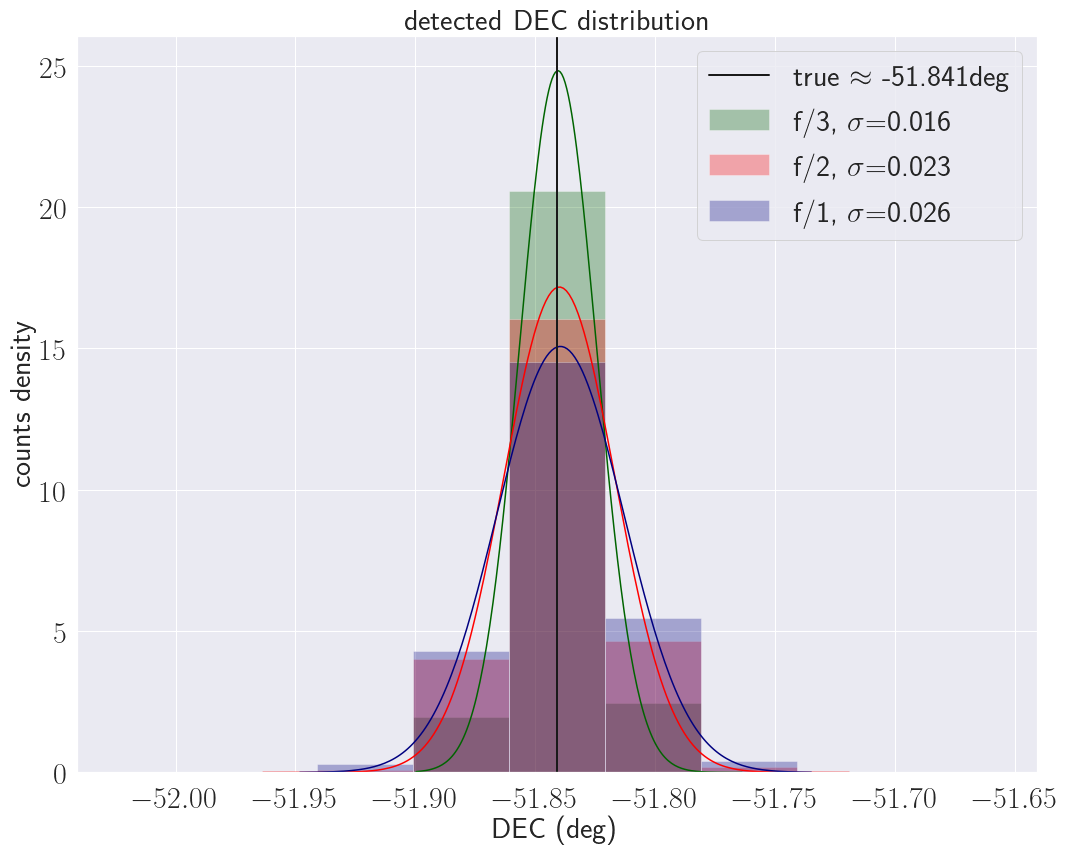

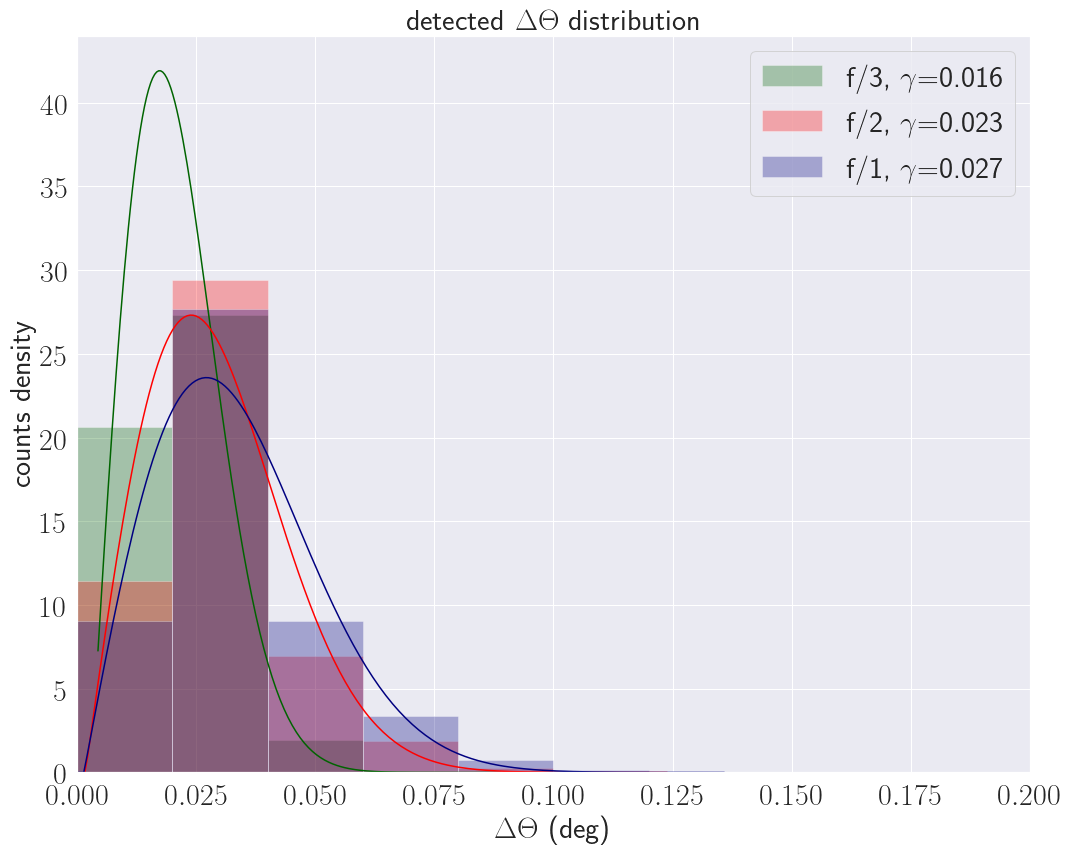

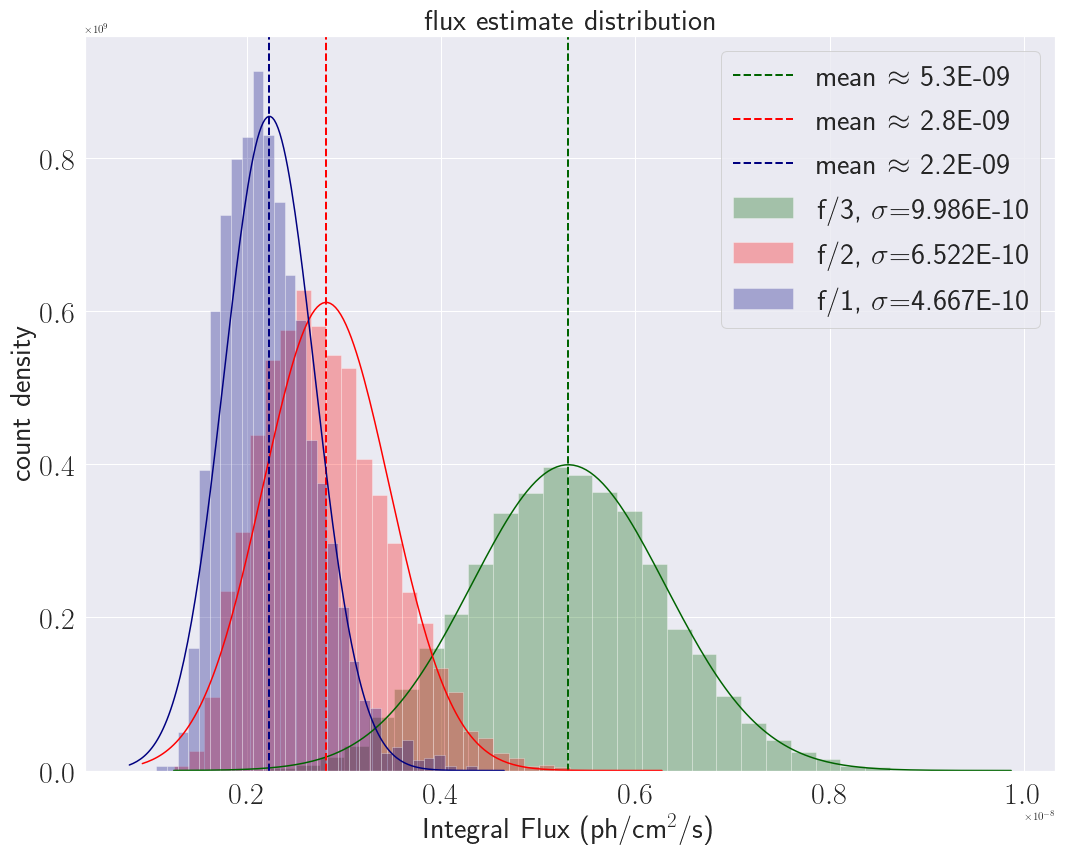

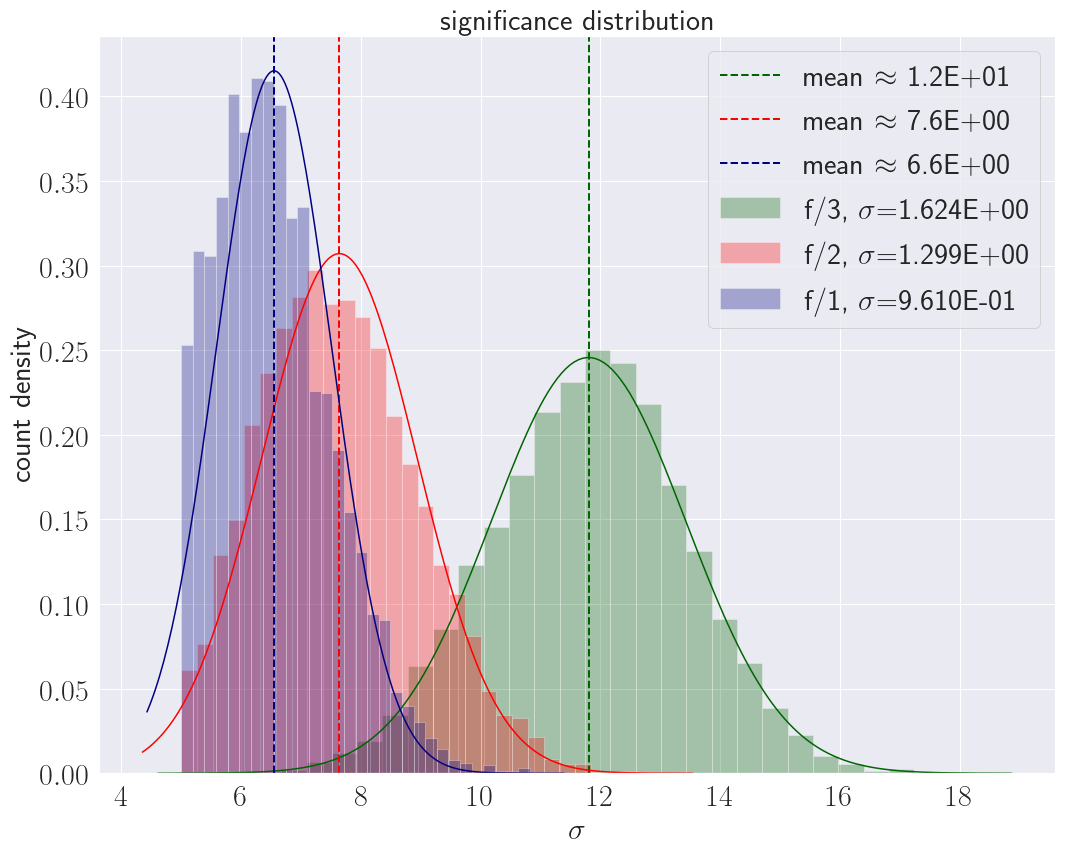

done plotting

tesi_final_1e4_degraded_tmin90s50s_flux1/

tesi_final_1e4_degraded_tmin90s50s_flux2/

tesi_final_1e4_degraded_tmin90s50s_flux3/


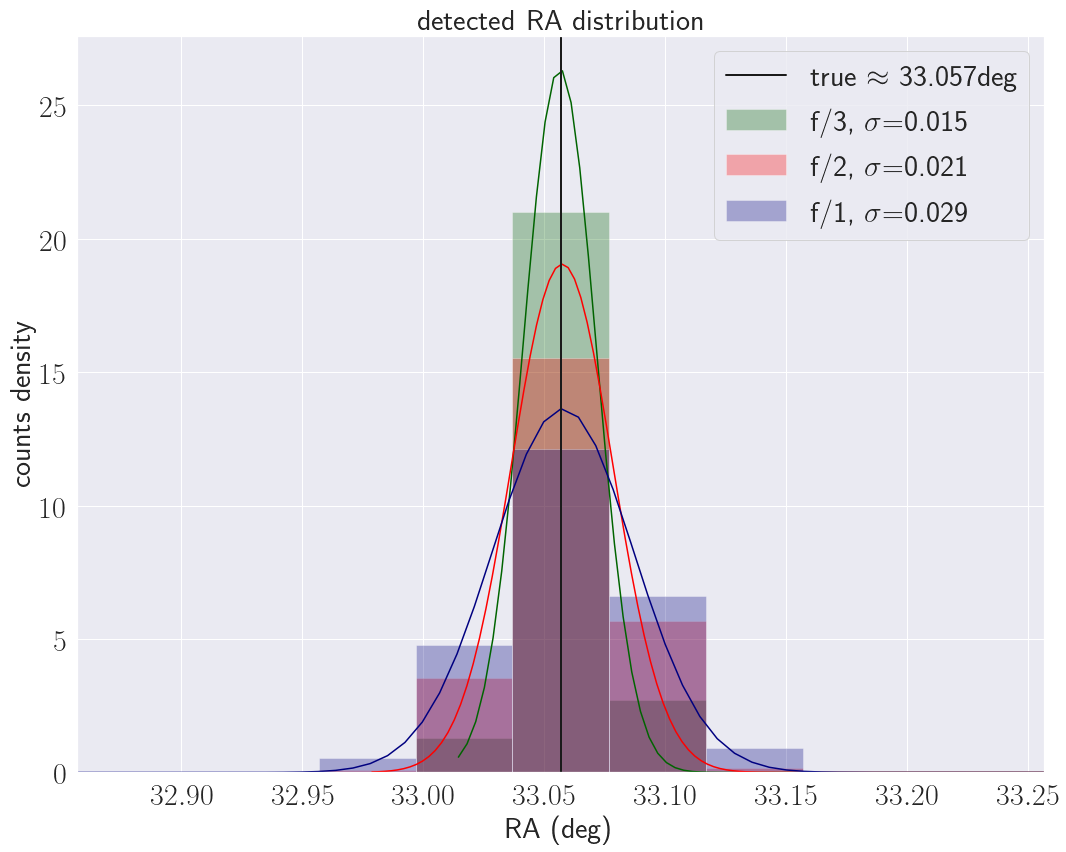

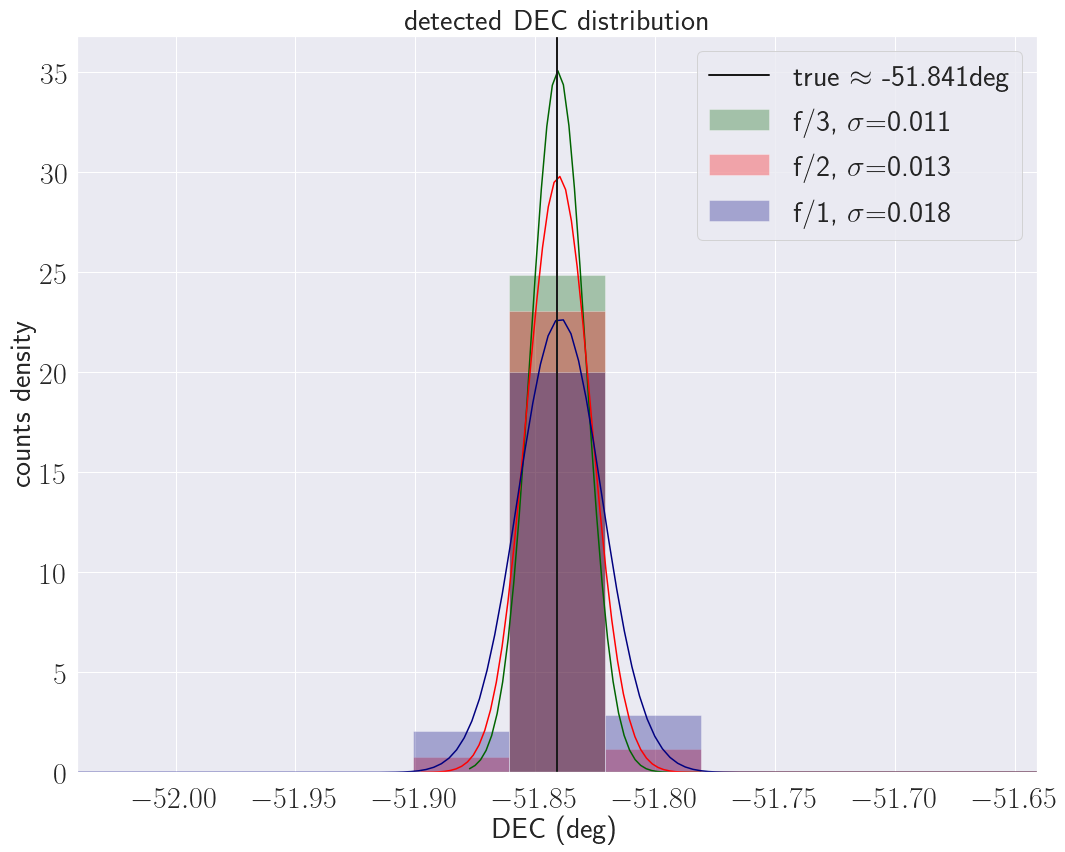

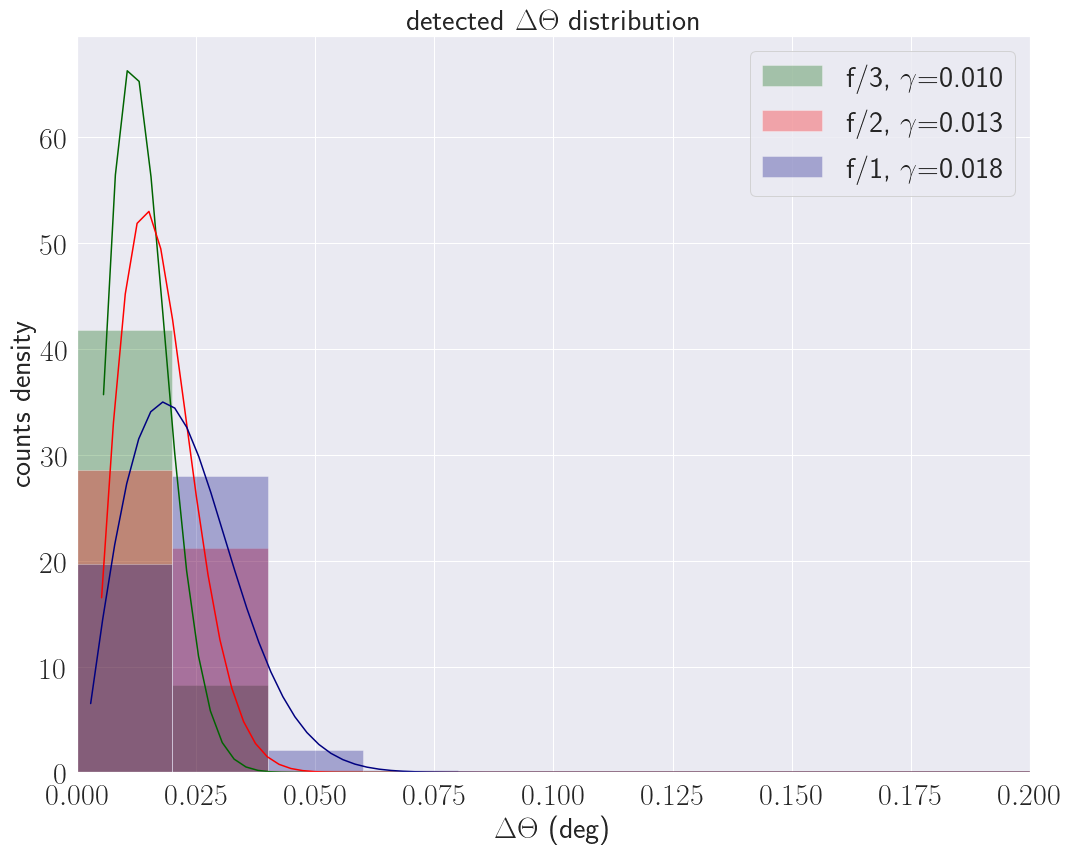

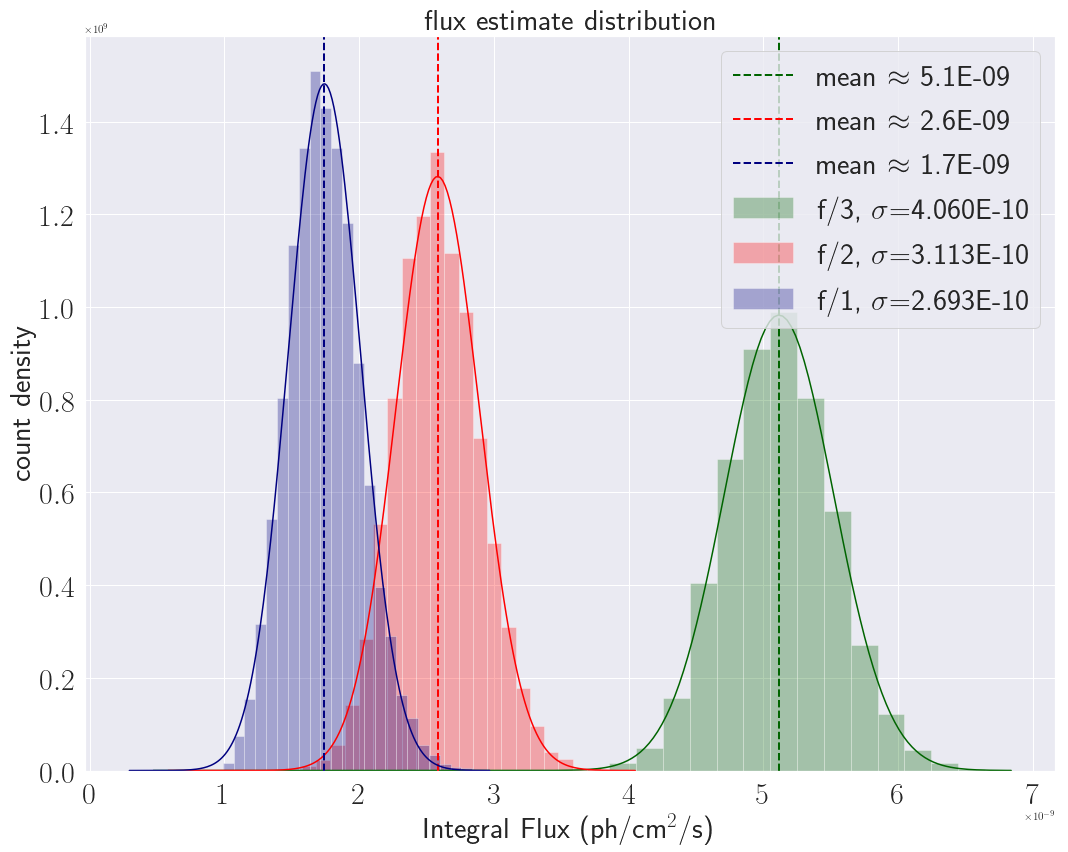

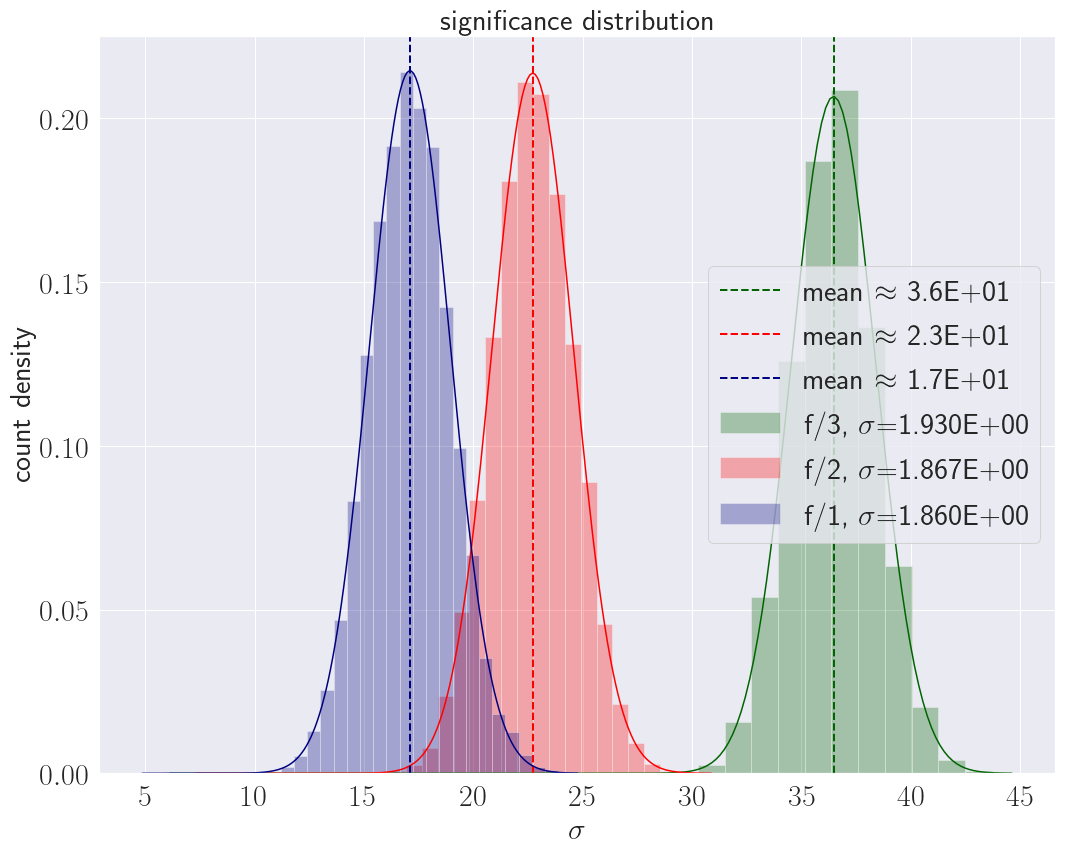

done plotting
done


In [20]:
# ======================
# !!! ALL FLUX PLOTS !!!
# ======================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from scipy.stats import rayleigh, norm
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse, Circle, Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
sys.path.append('/home/ambra/Desktop/cluster-morgana/')
from module_statistics import *
from statistics import mean

png_path = '/home/ambra/Desktop/cluster-morgana/archive_tests/tesi_05_final_results/png/'
if not os.path.isdir(png_path):
    os.mkdir(png_path)

fluxes = [1, 2, 3]
ffolders = [nfolders, dfolders]
for j in range(len(ffolders)):
    for n in range(len(texp)):
        list_ra, list_dec, list_pos = ([] for j in range(3))
        list_mode_pos, list_mean_ra, list_mean_dec, list_mean_pos = ([] for j in range(4))
        list_std_ra, list_std_dec = ([] for j in range(2))
        list_flux, list_mean_flux, list_std_flux = ([] for j in range(3))
        list_ts, list_mean_ts, list_std_ts = ([] for j in range(3))
        flux_threshold = []

        for index, f in enumerate(ffolders[j]):
            print('\n' + f)
            path = directory + f + 'run0406/run0406_ID000126/csv/'

            # store values ---!
            filename = 'data_%ds.csv' %texp[n]

            # load DataFrame and column names ---!
            df = pd.read_csv(path+filename)
            cols = list(df.columns)
            trials = len(df[cols[0]])
            # drop duplicates ---! 
            df.sort_values(cols[0], inplace = True) 
            # dropping ALL duplicte values 
            df.drop_duplicates(subset=cols[0], keep='last', inplace=True) 
            trials = len(df[cols[0]])
            total = trials
            # drop NaN ---!
            df = df.dropna()
            trials = len(df[cols[0]])
            df = df.reindex(np.arange(trials))
            # set arrays ---!
            # 0      1     2      3     4     5       6        7       8        9        10/-1  
            # trial, texp, sigma, Ndet, Nsrc, RA_det, DEC_det, RA_fit, DEC_fit, flux_ph, TS
            ts = np.array(df[cols[-1]]) 
            trials = len(ts)
            df = df.reindex(np.arange(trials))
            perc = 100 * (trials/total)

            for i, val in enumerate(ts):
                if val < ts_threshold:
                    df = df.drop([i])

            trial = np.array(df[cols[0]])
            raDet = np.array(df[cols[5]])
            decDet = np.array(df[cols[6]])
            flux = np.array(df[cols[9]])
            ts = np.sqrt(np.array(df[cols[-1]]))

            # DETECTION ---!
            distance_det = []
            d_det = []
            ra_det = []
            dec_det = []
            flux_fit = []
            ts_fit = []

            for i in range(len(raDet)) :
                if ts[i]>ts_threshold:
                    if -90 <= decDet[i] and decDet[i] <= 90 and 0 <= raDet[i] and raDet[i] <= 360 :
                        det_coord = SkyCoord(ra = raDet[i]*u.deg, dec = decDet[i]*u.deg, frame='fk5')
                        dist = float(true_coord.separation(det_coord).deg)
                        distance_det.append(dist)                  

                        if dist <= threshold:
                            d_det.append(dist)
                            ra_det.append(raDet[i]) 
                            dec_det.append(decDet[i]) 
                            flux_fit.append(flux[i])
                            ts_fit.append(ts[i])

            perc_det = len(d_det)/total * 100

            # MEAN DET ---!
            mean_raDet = np.nanmean(ra_det)
            std_raDet = np.nanstd(ra_det)
            mean_decDet = np.nanmean(dec_det)
            std_decDet = np.nanstd(dec_det)
            mean_posDet = np.nanmean(d_det)

            tmp = 0
            for i in range(len(d_det)) :
                tmp += d_det[i]**2

            if len(d_det) != 0.0 :
                mode_det = np.sqrt(1/(2*len(d_det)) * tmp)   
                MLE_det = 0.606/mode_det
            else:
                mode_det = np.nan
                MLE_det = np.nan

            # MAX LIKELIHOOD ---! 
            mean_ts = np.nanmean(ts_fit)
            std_ts = np.nanstd(ts_fit)   
            mean_flux = np.nanmean(flux_fit)
            std_flux = np.nanstd(flux_fit)

            list_ra.append(ra_det)
            list_dec.append(dec_det)
            list_pos.append(d_det)
            list_flux.append(flux_fit)
            list_ts.append(ts_fit)
            list_mean_ra.append(mean_raDet)
            list_mean_dec.append(mean_decDet)
            list_mean_pos.append(mean_posDet)
            list_mean_flux.append(mean_flux)
            list_mean_ts.append(mean_ts)
            list_std_ra.append(std_raDet)
            list_std_dec.append(std_decDet)
            list_mode_pos.append(mode_det)
            list_std_flux.append(std_flux)
            list_std_ts.append(std_ts)
            flux_threshold.append(mean_flux-np.min(flux_fit))
            flux_threshold.append(np.max(flux_fit)-mean_flux)

        # gathered per texp
        if j == 1:
            prefix = 'nom_texp%ds_' %texp[n]
        else:
            prefix = 'deg_texp%ds_' %texp[n]
        plottage(texp, list_ra, list_dec, list_pos, list_flux, list_mean_flux, list_ts, list_mean_ts,
                 list_std_ra, list_std_dec, list_mode_pos, list_std_flux, list_std_ts,
                 trueRA, trueDEC, png_path, lset='flux', prefix=prefix)
        print('done plotting')
print('done')